# Telecom Churn Case study
- Naresh Dogra 
- Upgrad Cohort 2018

##### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Understanding and Defining Churn
There are two main models of payment in the telecom industry - postpaid (customers pay a monthly/annual bill after using the services) and prepaid (customers pay/recharge with a certain amount in advance and then use the services).

In the postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn.

However, in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily (e.g. someone may be on a trip abroad for a month or two and then intend to resume using the services again).

Thus, churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.  Also, prepaid is the most common model in India and southeast Asia, while postpaid is more common in Europe in North America.

This project is based on the Indian and Southeast Asian market.

Definitions of Churn
There are various ways to define churn, such as:

Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

The main shortcoming of this definition is that there are customers who only receive calls/SMSes from their wage-earning counterparts, i.e. they don’t generate revenue but use the services. For example, many users in rural areas only receive calls from their wage-earning siblings in urban areas.

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

In this project, you will use the usage-based definition to define churn.

High-value Churn
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, you will define high-value customers based on a certain metric (mentioned later below) and predict churn only on high-value customers.


Understanding the Business Objective and the Data
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

##### Modelling
Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

In some cases, both of the above-stated goals can be achieved by a single machine learning model. But here, you have a large number of attributes, and thus you should try using a dimensionality reduction technique such as PCA and then build a predictive model. After PCA, you can use any classification model.

Also, since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - try using techniques to handle class imbalance. 

You can take the following suggestive steps to build the model:

Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

Derive new features.

Reduce the number of variables using PCA.

Train a variety of models, tune model hyperparameters, etc. (handle class imbalance using appropriate techniques).

Evaluate the models using appropriate evaluation metrics. Note that is is more important to identify churners than the non-churners accurately - choose an appropriate evaluation metric which reflects this business goal.

Finally, choose a model based on some evaluation metric.

The above model will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.
 
After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

Finally, recommend strategies to manage customer churn based on your observations.

In [1]:
#churn_df_filter# Find the character encoding for the file telecom_churn_data.csv file
# Use this encoding to read the file

#import chardet
#from pathlib import Path
#folder = Path('.')
#rawdata = open(folder/'telecom_churn_data.csv', 'rb').read()
#result = chardet.detect(rawdata)
#charenc = result['encoding']
#print(charenc)

#The detected encoding was found to be ascii.
#Above code has been commented since it has been detected once and we can ignore to run it repeatedly 

In [1792]:
# Let's import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# We have to use latest version as, seabrone: 0.9.0, for Catplot to work
from pathlib import Path

In [1793]:
# Load the input file
#folder = Path('.')

#folder = Path('.')

folder = Path('C:/Upgrad Projects/ML2-GP1-Telecom Churn')
churn_df_orig = pd.read_csv(folder/'telecom_churn_data.csv', encoding = "ascii")

#We may need to relook at the original data, so churn_df_orig dataframe shall be used for this purpose
#churn_df will be the dataframe which will undergo all the manipulations

# Data Preparation (includes cleaning, missing value treatment and feature engineering)

In [1794]:
#Make a copy

churn_df = churn_df_orig

In [1795]:
# since we can't see many columns, let's widen the column display limit
pd.set_option('display.max_columns', 226)
pd.set_option('display.max_rows', 200)

In [1796]:
churn_df_orig.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [1797]:
# Load the data dictionary
# dict_df = pd.read_excel(folder/'DataDictionaryTelecomChurnCaseStudy.xlsx')
# dict_df.head(50)

In [1798]:
# save initial column list
init_col_list = list(churn_df.columns)

In [1799]:
# Columns could have some whitespace, let's get rid of those
churn_df.columns = churn_df.columns.map(lambda x: x.strip())

In [1800]:
churn_df.shape

(99999, 226)

In [1801]:
# Find columns that are totally empty or have 100% NaN values
emptycol_list = []
for i in churn_df.columns:
    if churn_df[i].isnull().all() == True:
        emptycol_list.append(i)
print("Empty columns are: ", emptycol_list)
print("Total empty columns are:", len(emptycol_list))

Empty columns are:  []
Total empty columns are: 0


In [1802]:
# Let's drop all columns having all NaNs
#there are no columns having all NaNs
churn_df.shape
churn_df = churn_df.dropna(axis=1,how='all')

In [1803]:
churn_df.shape

(99999, 226)

In [1804]:
# Let's see which of the columns have only one unique value in entire series.
# And let's drop those
#circle_id and last_date_of_month_6 is dropped
for i in churn_df.columns:
    if len(churn_df[i].unique()) == 1:
        print(i , churn_df[i].value_counts())
        churn_df.drop(i, axis = 1, inplace=True)

circle_id 109    99999
Name: circle_id, dtype: int64
last_date_of_month_6 6/30/2014    99999
Name: last_date_of_month_6, dtype: int64


In [1805]:
churn_df.shape

(99999, 224)

In [1806]:
#Let us check the unique values in all fields
for i in churn_df.columns:
    print(i , len(churn_df[i].unique()))


mobile_number 99999
loc_og_t2o_mou 2
std_og_t2o_mou 2
loc_ic_t2o_mou 2
last_date_of_month_7 2
last_date_of_month_8 2
last_date_of_month_9 2
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24314
onnet_mou_7 24337
onnet_mou_8 24090
onnet_mou_9 23566
offnet_mou_6 31141
offnet_mou_7 31024
offnet_mou_8 30909
offnet_mou_9 30078
roam_ic_mou_6 6513
roam_ic_mou_7 5231
roam_ic_mou_8 5316
roam_ic_mou_9 4828
roam_og_mou_6 8039
roam_og_mou_7 6640
roam_og_mou_8 6505
roam_og_mou_9 5883
loc_og_t2t_mou_6 13540
loc_og_t2t_mou_7 13412
loc_og_t2t_mou_8 13337
loc_og_t2t_mou_9 12950
loc_og_t2m_mou_6 20906
loc_og_t2m_mou_7 20638
loc_og_t2m_mou_8 20545
loc_og_t2m_mou_9 20142
loc_og_t2f_mou_6 3861
loc_og_t2f_mou_7 3864
loc_og_t2f_mou_8 3808
loc_og_t2f_mou_9 3759
loc_og_t2c_mou_6 2236
loc_og_t2c_mou_7 2427
loc_og_t2c_mou_8 2517
loc_og_t2c_mou_9 2333
loc_og_mou_6 26373
loc_og_mou_7 26092
loc_og_mou_8 25991
loc_og_mou_9 25377
std_og_t2t_mou_6 18245
std_og_t2t_mou_7 18568
std_og_t2t_mou_8 18292
std

In [1807]:
# Let us check the columns having only 2 unique values
# Among these, we aim to drop those that have a Null as one of the values and one another value
null_val_col_list = []
for i in churn_df.columns:
    if len(churn_df[i].unique()) == 2:
        print("For column: {}, the unique values are: {}".format(i, churn_df[i].unique()))
        null_val_col_list.append(i)

For column: loc_og_t2o_mou, the unique values are: [  0.  nan]
For column: std_og_t2o_mou, the unique values are: [  0.  nan]
For column: loc_ic_t2o_mou, the unique values are: [  0.  nan]
For column: last_date_of_month_7, the unique values are: ['7/31/2014' nan]
For column: last_date_of_month_8, the unique values are: ['8/31/2014' nan]
For column: last_date_of_month_9, the unique values are: ['9/30/2014' nan]
For column: std_og_t2c_mou_6, the unique values are: [ nan   0.]
For column: std_og_t2c_mou_7, the unique values are: [ nan   0.]
For column: std_og_t2c_mou_8, the unique values are: [  0.  nan]
For column: std_og_t2c_mou_9, the unique values are: [ nan   0.]
For column: std_ic_t2o_mou_6, the unique values are: [ nan   0.]
For column: std_ic_t2o_mou_7, the unique values are: [ nan   0.]
For column: std_ic_t2o_mou_8, the unique values are: [  0.  nan]
For column: std_ic_t2o_mou_9, the unique values are: [ nan   0.]


In [1808]:
null_val_col_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [1809]:
len(null_val_col_list)

14

In [1810]:
# We can remove all columns in null_val_col_list
churn_df.drop(columns = null_val_col_list, axis=1, inplace=True)

In [1811]:
churn_df.shape

(99999, 210)

In [1812]:
# We will calculate percentage of null values in the entire dataset for each of the attributes

percentage_null_df=pd.DataFrame(round(100*(churn_df.isnull().sum()/len(churn_df.index)),2))
percentage_null_df.head()

,0
mobile_number,0.0
arpu_6,0.0
arpu_7,0.0
arpu_8,0.0
arpu_9,0.0


In [1813]:
# renaming column to Percentage
percentage_null_df.columns=["Percentage"]

In [1814]:
# To get percentage of Null values in the data set in descending order
percentage_null_df=percentage_null_df.sort_values('Percentage',ascending=False)
percentage_null_df.head(50)

,Percentage
max_rech_data_6,74.85
fb_user_6,74.85
count_rech_3g_6,74.85
count_rech_2g_6,74.85
night_pck_user_6,74.85
arpu_3g_6,74.85
total_rech_data_6,74.85
av_rech_amt_data_6,74.85
arpu_2g_6,74.85
date_of_last_rech_data_6,74.85


In [1815]:
churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.

In [1816]:
# we see that 'count' column doesnt offer much in terms of data explanation and since it has close to 75% of Null Values we can comfortably remove them
churn_df.drop(['count_rech_2g_6'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_7'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_8'], axis = 1, inplace = True)
churn_df.drop(['count_rech_2g_9'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_6'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_7'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_8'], axis = 1, inplace = True)
churn_df.drop(['count_rech_3g_9'], axis = 1, inplace = True)

In [1817]:
# Again we see that max_rech_ data attribute would be redundant for us, since we are making use of total revenue and recharge usage / month / user 
churn_df.drop(['max_rech_data_6'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_7'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_8'], axis = 1, inplace = True)
churn_df.drop(['max_rech_data_9'], axis = 1, inplace = True)

In [1818]:
# We will drop insiginificant columns where in even if we fill Null values it doesnt add anything to data

churn_df.drop(['date_of_last_rech_data_6'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_7'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_8'], axis = 1, inplace = True)
churn_df.drop(['date_of_last_rech_data_9'], axis = 1, inplace = True)

In [1819]:
churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,

In [1820]:
# make a copy 
churn_df_filter=churn_df

In [1821]:
churn_df_filter.shape

(99999, 194)

In [1822]:
churn_df_filter.isnull().sum()

mobile_number              0
arpu_6                     0
arpu_7                     0
arpu_8                     0
arpu_9                     0
onnet_mou_6             3937
onnet_mou_7             3859
onnet_mou_8             5378
onnet_mou_9             7745
offnet_mou_6            3937
offnet_mou_7            3859
offnet_mou_8            5378
offnet_mou_9            7745
roam_ic_mou_6           3937
roam_ic_mou_7           3859
roam_ic_mou_8           5378
roam_ic_mou_9           7745
roam_og_mou_6           3937
roam_og_mou_7           3859
roam_og_mou_8           5378
roam_og_mou_9           7745
loc_og_t2t_mou_6        3937
loc_og_t2t_mou_7        3859
loc_og_t2t_mou_8        5378
loc_og_t2t_mou_9        7745
loc_og_t2m_mou_6        3937
loc_og_t2m_mou_7        3859
loc_og_t2m_mou_8        5378
loc_og_t2m_mou_9        7745
loc_og_t2f_mou_6        3937
loc_og_t2f_mou_7        3859
loc_og_t2f_mou_8        5378
loc_og_t2f_mou_9        7745
loc_og_t2c_mou_6        3937
loc_og_t2c_mou

In [1823]:
#Let us fill all nan to 0 indicating that services are not availed wherever it is null
# We will add 0's only to those columns which are important to us. others we will drop in future
churn_df_filter.fillna(0,axis=1,inplace=True)

In [1824]:
churn_df_filter.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13

In [1825]:
# now lets check if there are any more null values
# seems like there are no null values
churn_df_filter.isnull().sum()

mobile_number          0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_t2c_mou_9       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0


In [1826]:
#Let us check the unique values again in all fields
for i in churn_df.columns:
     print(i , len(churn_df_filter[i].unique()))

mobile_number 99999
arpu_6 85681
arpu_7 85308
arpu_8 83615
arpu_9 79937
onnet_mou_6 24313
onnet_mou_7 24336
onnet_mou_8 24089
onnet_mou_9 23565
offnet_mou_6 31140
offnet_mou_7 31023
offnet_mou_8 30908
offnet_mou_9 30077
roam_ic_mou_6 6512
roam_ic_mou_7 5230
roam_ic_mou_8 5315
roam_ic_mou_9 4827
roam_og_mou_6 8038
roam_og_mou_7 6639
roam_og_mou_8 6504
roam_og_mou_9 5882
loc_og_t2t_mou_6 13539
loc_og_t2t_mou_7 13411
loc_og_t2t_mou_8 13336
loc_og_t2t_mou_9 12949
loc_og_t2m_mou_6 20905
loc_og_t2m_mou_7 20637
loc_og_t2m_mou_8 20544
loc_og_t2m_mou_9 20141
loc_og_t2f_mou_6 3860
loc_og_t2f_mou_7 3863
loc_og_t2f_mou_8 3807
loc_og_t2f_mou_9 3758
loc_og_t2c_mou_6 2235
loc_og_t2c_mou_7 2426
loc_og_t2c_mou_8 2516
loc_og_t2c_mou_9 2332
loc_og_mou_6 26372
loc_og_mou_7 26091
loc_og_mou_8 25990
loc_og_mou_9 25376
std_og_t2t_mou_6 18244
std_og_t2t_mou_7 18567
std_og_t2t_mou_8 18291
std_og_t2t_mou_9 17934
std_og_t2m_mou_6 19734
std_og_t2m_mou_7 20018
std_og_t2m_mou_8 19786
std_og_t2m_mou_9 19052
std_og_t

In [1827]:
churn_df_filter[['total_rech_data_6']].head()

,total_rech_data_6
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [1828]:
# Let's derive a few columns that could be important for modelling 
churn_df_filter['total_data_rech_6'] = churn_df_filter['total_rech_data_6'] * churn_df_filter['av_rech_amt_data_6']
churn_df_filter['total_data_rech_7'] = churn_df_filter['total_rech_data_7'] * churn_df_filter['av_rech_amt_data_7']
churn_df_filter['amt_data_6'] = churn_df_filter['total_rech_amt_6'] + churn_df_filter['total_data_rech_6']
churn_df_filter['amt_data_7'] = churn_df_filter['total_rech_amt_7'] + churn_df_filter['total_data_rech_7']

In [1829]:
churn_df_filter['total_data_rech_8'] = churn_df_filter['total_rech_data_8'] * churn_df_filter['av_rech_amt_data_8']
churn_df_filter['total_data_rech_9'] = churn_df_filter['total_rech_data_9'] * churn_df_filter['av_rech_amt_data_9']
churn_df_filter['amt_data_8'] = churn_df_filter['total_rech_amt_8'] + churn_df_filter['total_data_rech_8']
churn_df_filter['amt_data_9'] = churn_df_filter['total_rech_amt_9'] + churn_df_filter['total_data_rech_9']

In [1830]:
churn_df_filter.shape

(99999, 202)

In [1831]:
# Some columns do not conform to the nomenclature standards of the dataset, let's fix those
churn_df_filter.rename(columns = {'aug_vbc_3g':'vbc_3g_8'}, inplace = True)
churn_df_filter.rename(columns = {'jun_vbc_3g':'vbc_3g_6'}, inplace = True)
churn_df_filter.rename(columns = {'jul_vbc_3g':'vbc_3g_7'}, inplace = True)
churn_df_filter.rename(columns = {'sep_vbc_3g':'vbc_3g_9'}, inplace = True)

In [1832]:
# Create column list that can be modified for transformation to _good, _action, _churn types
# We will exclude those that have binary values (unique values == 2)
xform_cols_list = []
for i in churn_df_filter.columns:
    if (i[-2:] == '_6') & (len(churn_df_filter[i].unique()) > 2) :
        xform_cols_list.append(i[0:len(i)-2])
print(xform_cols_list)

['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'vbc_3g', 'total_data_rech', 'amt_data']


In [1833]:
len(xform_cols_list)

48

In [1834]:
churn_df_filter['sachet_3g_6'].unique()

array([ 0,  1,  3,  8,  2,  4,  6,  5, 10, 22,  7, 13, 29, 16, 18, 12, 11,
        9, 23, 14, 19, 15, 21, 17, 28], dtype=int64)

In [1835]:
# Let's remove the date columns from the list to be transformed
xform_cols_list.remove('date_of_last_rech')
xform_cols_list

['arpu',
 'onnet_mou',
 'offnet_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'loc_og_t2t_mou',
 'loc_og_t2m_mou',
 'loc_og_t2f_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'std_og_t2t_mou',
 'std_og_t2m_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'og_others',
 'total_og_mou',
 'loc_ic_t2t_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2f_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2m_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'total_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'total_rech_num',
 'total_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_3g_mb',
 'arpu_3g',
 'arpu_2g',
 'monthly_2g',
 'sachet_2g',
 'monthly_3g',
 'sachet_3g',
 'vbc_3g',
 'total_data_rech',
 'amt_data']

In [1836]:
# Now let's transform these columns
for i in xform_cols_list:
    churn_df_filter[i+'_6'] = round((churn_df_filter[i+'_6'] + churn_df_filter[i+'_7'])/2, 2)
    churn_df_filter.rename(columns={i+'_6': i+'_good'}, inplace=True)
    churn_df_filter.rename(columns={i+'_8': i+'_action'}, inplace=True)
    churn_df_filter.rename(columns={i+'_9': i+'_churn'}, inplace=True)
    churn_df_filter.drop([i+'_7'], axis=1, inplace=True)

In [1837]:
# We see that there are columns with date type information, let's drop those for now
churn_df_filter.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace = True)

In [1838]:
churn_df_filter.head()

,mobile_number,arpu_good,arpu_action,arpu_churn,onnet_mou_good,onnet_mou_action,onnet_mou_churn,offnet_mou_good,offnet_mou_action,offnet_mou_churn,roam_ic_mou_good,roam_ic_mou_action,roam_ic_mou_churn,roam_og_mou_good,roam_og_mou_action,roam_og_mou_churn,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2t_mou_churn,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2m_mou_churn,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2f_mou_churn,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2c_mou_churn,loc_og_mou_good,loc_og_mou_action,loc_og_mou_churn,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2t_mou_churn,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2m_mou_churn,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2f_mou_churn,std_og_mou_good,std_og_mou_action,std_og_mou_churn,isd_og_mou_good,isd_og_mou_action,isd_og_mou_churn,spl_og_mou_good,spl_og_mou_action,spl_og_mou_churn,og_others_good,og_others_action,og_others_churn,total_og_mou_good,total_og_mou_action,total_og_mou_churn,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2t_mou_churn,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2m_mou_churn,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2f_mou_churn,loc_ic_mou_good,loc_ic_mou_action,loc_ic_mou_churn,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2t_mou_churn,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2m_mou_churn,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2f_mou_churn,std_ic_mou_good,std_ic_mou_action,std_ic_mou_churn,total_ic_mou_good,total_ic_mou_action,total_ic_mou_churn,spl_ic_mou_good,spl_ic_mou_action,spl_ic_mou_churn,isd_ic_mou_good,isd_ic_mou_action,isd_ic_mou_churn,ic_others_good,ic_others_action,ic_others_churn,total_rech_num_good,total_rech_num_action,total_rech_num_churn,total_rech_amt_good,total_rech_amt_action,total_rech_amt_churn,max_rech_amt_good,max_rech_amt_action,max_rech_amt_churn,last_day_rch_amt_good,last_day_rch_amt_action,last_day_rch_amt_churn,total_rech_data_good,total_rech_data_action,total_rech_data_churn,av_rech_amt_data_good,av_rech_amt_data_action,av_rech_amt_data_churn,vol_2g_mb_good,vol_2g_mb_action,vol_2g_mb_churn,vol_3g_mb_good,vol_3g_mb_action,vol_3g_mb_churn,arpu_3g_good,arpu_3g_action,arpu_3g_churn,arpu_2g_good,arpu_2g_action,arpu_2g_churn,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_good,monthly_2g_action,monthly_2g_churn,sachet_2g_good,sachet_2g_action,sachet_2g_churn,monthly_3g_good,monthly_3g_action,monthly_3g_churn,sachet_3g_good,sachet_3g_action,sachet_3g_churn,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,vbc_3g_action,vbc_3g_good,vbc_3g_churn,total_data_rech_good,amt_data_good,total_data_rech_action,total_data_rech_churn,amt_data_action,amt_data_churn
0,7000842753,206.10,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,3.5,2,6,307.0,252,0,252.0,252,0,252.0,252,0,1.0,1.0,0.0,252.0,252.0,0.0,15.72,5.75,0.0,117.16,109.61,0.00,212.17,212.17,0.00,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,1.0,1,0,0.0,0,0,1.0,1.0,1.0,0.0,968,30.4,50.60,3.58,252.0,559.0,252.0,0.0,504.0,0.0
1,7001865778,194.56,268.321,86.285,51.40,7.68,18.34,57.79,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,49.22,7.68,18.34,43.72,291.86,53.76,0.00,0.00,0.00,1.46,0.00,0.00,92.95,299.54,72.11,2.17,0.00,0.00,0.23,0.13,0.00,0.00,0.00,0.0,2.41,0.13,0.00,0.0,0.0,0.0,14.06,12.76,0.00,0.00,0.0,0.0,109.42,312.44,72.11,15.76,29.23,116.09,41.43,375.58,56.93,4.46,3.61,0.00,61.66,408.43,173.03,0.00,2.35,0.00,2.95,12.49,15.01,0.00,0.00,0.00,2.95,14.84,15.01,65.53,423.28,188.04,0.0,0.0,0.00,0.92,0.0,0.00,0.00,0.0,0.00,6.5,11,5,229.0,283,121,99.0,65,50,33.5,30,0,0.5,2.0,0.0,7

In [1839]:
# Columns that are categorical
cols_cat_list = ['night_pck_user_', 'fb_user_']
for i in cols_cat_list:
    for j in range(6,10):
        print("For column {}, unique values are: {}".format(i+str(j), churn_df_filter[i+str(j)].unique()))

For column night_pck_user_6, unique values are: [ 0.  1.]
For column night_pck_user_7, unique values are: [ 0.  1.]
For column night_pck_user_8, unique values are: [ 0.  1.]
For column night_pck_user_9, unique values are: [ 0.  1.]
For column fb_user_6, unique values are: [ 1.  0.]
For column fb_user_7, unique values are: [ 1.  0.]
For column fb_user_8, unique values are: [ 1.  0.]
For column fb_user_9, unique values are: [ 0.  1.]


In [1840]:
# # Columns that seem to be categorical
# cols_cat_list = ['night_pck_user_', 'fb_user_']
# for i in cols_cat_list:
#     for j in range(6,10):
#         #print("For column {}, unique values are: {}".format(i+str(j), churn_df_filter[i+str(j)].unique()))
#         churn_df_filter[i+str(j)] = churn_df_filter[i+str(j)].fillna(0)

     

In [1841]:
churn_df_filter.dtypes

mobile_number                int64
arpu_good                  float64
arpu_action                float64
arpu_churn                 float64
onnet_mou_good             float64
onnet_mou_action           float64
onnet_mou_churn            float64
offnet_mou_good            float64
offnet_mou_action          float64
offnet_mou_churn           float64
roam_ic_mou_good           float64
roam_ic_mou_action         float64
roam_ic_mou_churn          float64
roam_og_mou_good           float64
roam_og_mou_action         float64
roam_og_mou_churn          float64
loc_og_t2t_mou_good        float64
loc_og_t2t_mou_action      float64
loc_og_t2t_mou_churn       float64
loc_og_t2m_mou_good        float64
loc_og_t2m_mou_action      float64
loc_og_t2m_mou_churn       float64
loc_og_t2f_mou_good        float64
loc_og_t2f_mou_action      float64
loc_og_t2f_mou_churn       float64
loc_og_t2c_mou_good        float64
loc_og_t2c_mou_action      float64
loc_og_t2c_mou_churn       float64
loc_og_mou_good     

In [1842]:
# Categorical columns are misrepresented as float, let's fix those
churn_df_filter['night_pck_user_6'] = churn_df_filter['night_pck_user_6'].astype('int')
churn_df_filter['night_pck_user_7'] = churn_df_filter['night_pck_user_7'].astype('int')
churn_df_filter['night_pck_user_8'] = churn_df_filter['night_pck_user_8'].astype('int')
churn_df_filter['night_pck_user_9'] = churn_df_filter['night_pck_user_9'].astype('int')
churn_df_filter['fb_user_6'] = churn_df_filter['fb_user_6'].astype('int')
churn_df_filter['fb_user_7'] = churn_df_filter['fb_user_7'].astype('int')
churn_df_filter['fb_user_8'] = churn_df_filter['fb_user_8'].astype('int')
churn_df_filter['fb_user_9'] = churn_df_filter['fb_user_9'].astype('int')

In [1843]:
# Treating columns that are yet not categorized into 'good', 'action', 'churn'
# cols_cat_list = ['night_pck_user', 'fb_user']

# Now let's transform these columns
for i in cols_cat_list:
    churn_df_filter[i+'6'] = churn_df_filter[i+'6'] | churn_df_filter[i+'7']
    churn_df_filter.rename(columns={i+'6': i+'good'}, inplace=True)
    churn_df_filter.rename(columns={i+'8': i+'action'}, inplace=True)
    churn_df_filter.rename(columns={i+'9': i+'churn'}, inplace=True)
    churn_df_filter.drop([i+'7'], axis=1, inplace=True)

In [1844]:
churn_df_filter.head()

,mobile_number,arpu_good,arpu_action,arpu_churn,onnet_mou_good,onnet_mou_action,onnet_mou_churn,offnet_mou_good,offnet_mou_action,offnet_mou_churn,roam_ic_mou_good,roam_ic_mou_action,roam_ic_mou_churn,roam_og_mou_good,roam_og_mou_action,roam_og_mou_churn,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2t_mou_churn,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2m_mou_churn,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2f_mou_churn,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2c_mou_churn,loc_og_mou_good,loc_og_mou_action,loc_og_mou_churn,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2t_mou_churn,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2m_mou_churn,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2f_mou_churn,std_og_mou_good,std_og_mou_action,std_og_mou_churn,isd_og_mou_good,isd_og_mou_action,isd_og_mou_churn,spl_og_mou_good,spl_og_mou_action,spl_og_mou_churn,og_others_good,og_others_action,og_others_churn,total_og_mou_good,total_og_mou_action,total_og_mou_churn,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2t_mou_churn,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2m_mou_churn,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2f_mou_churn,loc_ic_mou_good,loc_ic_mou_action,loc_ic_mou_churn,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2t_mou_churn,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2m_mou_churn,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2f_mou_churn,std_ic_mou_good,std_ic_mou_action,std_ic_mou_churn,total_ic_mou_good,total_ic_mou_action,total_ic_mou_churn,spl_ic_mou_good,spl_ic_mou_action,spl_ic_mou_churn,isd_ic_mou_good,isd_ic_mou_action,isd_ic_mou_churn,ic_others_good,ic_others_action,ic_others_churn,total_rech_num_good,total_rech_num_action,total_rech_num_churn,total_rech_amt_good,total_rech_amt_action,total_rech_amt_churn,max_rech_amt_good,max_rech_amt_action,max_rech_amt_churn,last_day_rch_amt_good,last_day_rch_amt_action,last_day_rch_amt_churn,total_rech_data_good,total_rech_data_action,total_rech_data_churn,av_rech_amt_data_good,av_rech_amt_data_action,av_rech_amt_data_churn,vol_2g_mb_good,vol_2g_mb_action,vol_2g_mb_churn,vol_3g_mb_good,vol_3g_mb_action,vol_3g_mb_churn,arpu_3g_good,arpu_3g_action,arpu_3g_churn,arpu_2g_good,arpu_2g_action,arpu_2g_churn,night_pck_user_good,night_pck_user_action,night_pck_user_churn,monthly_2g_good,monthly_2g_action,monthly_2g_churn,sachet_2g_good,sachet_2g_action,sachet_2g_churn,monthly_3g_good,monthly_3g_action,monthly_3g_churn,sachet_3g_good,sachet_3g_action,sachet_3g_churn,fb_user_good,fb_user_action,fb_user_churn,aon,vbc_3g_action,vbc_3g_good,vbc_3g_churn,total_data_rech_good,amt_data_good,total_data_rech_action,total_data_rech_churn,amt_data_action,amt_data_churn
0,7000842753,206.10,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.00,3.5,2,6,307.0,252,0,252.0,252,0,252.0,252,0,1.0,1.0,0.0,252.0,252.0,0.0,15.72,5.75,0.0,117.16,109.61,0.00,212.17,212.17,0.00,212.17,212.17,0.0,0,0,0,0.0,0,0,0.0,0,0,1.0,1,0,0.0,0,0,1,1,0,968,30.4,50.60,3.58,252.0,559.0,252.0,0.0,504.0,0.0
1,7001865778,194.56,268.321,86.285,51.40,7.68,18.34,57.79,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,49.22,7.68,18.34,43.72,291.86,53.76,0.00,0.00,0.00,1.46,0.00,0.00,92.95,299.54,72.11,2.17,0.00,0.00,0.23,0.13,0.00,0.00,0.00,0.0,2.41,0.13,0.00,0.0,0.0,0.0,14.06,12.76,0.00,0.00,0.0,0.0,109.42,312.44,72.11,15.76,29.23,116.09,41.43,375.58,56.93,4.46,3.61,0.00,61.66,408.43,173.03,0.00,2.35,0.00,2.95,12.49,15.01,0.00,0.00,0.00,2.95,14.84,15.01,65.53,423.28,188.04,0.0,0.0,0.00,0.92,0.0,0.00,0.00,0.0,0.00,6.5,11,5,229.0,283,121,99.0,65,50,33.5,30,0,0.5,2.0,0.0,77.0,50.0,0.0,54.04,365.

In [1845]:
#churn_df.head()
#get the quantile value for 70percent
q70 = churn_df_filter['amt_data_good'].quantile(0.70)
print(q70)

478.0


In [1846]:
# Mark high-value customers based on the 70-th percentile of recharge amounts
churn_df_filter['hv_customer'] = churn_df_filter['amt_data_good'].map(lambda x: 1 if x >= q70 else 0)

In [1847]:
# Since we need to predict the churn for high-value customers only, let's consider only high-values customers
churn_df_filter = churn_df_filter.loc[churn_df['hv_customer']==1]

In [1848]:
# Let's see how the dataframe dimension now look like
churn_df_filter.shape

(30001, 150)

In [1849]:
# Any nulls remaining or got introduced during feature engineering
round(churn_df_filter.isnull().sum(axis=1)/len(churn_df_filter.columns)*100,2).sort_values(ascending=False)

99997    0.0
33373    0.0
33319    0.0
33326    0.0
33328    0.0
33329    0.0
33332    0.0
33333    0.0
33334    0.0
33338    0.0
33340    0.0
33341    0.0
33343    0.0
33351    0.0
33374    0.0
33434    0.0
33377    0.0
33383    0.0
33389    0.0
33390    0.0
33391    0.0
33399    0.0
33400    0.0
33412    0.0
33413    0.0
33415    0.0
33418    0.0
33424    0.0
33317    0.0
33314    0.0
33312    0.0
33309    0.0
33224    0.0
33226    0.0
33230    0.0
33232    0.0
33235    0.0
33237    0.0
33240    0.0
33243    0.0
33244    0.0
33248    0.0
33253    0.0
33260    0.0
33261    0.0
33265    0.0
33269    0.0
33270    0.0
33274    0.0
33276    0.0
33281    0.0
33287    0.0
33288    0.0
33290    0.0
33292    0.0
33294    0.0
33304    0.0
33425    0.0
33442    0.0
32833    0.0
33573    0.0
33531    0.0
33534    0.0
33536    0.0
33540    0.0
33542    0.0
33544    0.0
33551    0.0
33552    0.0
33566    0.0
33569    0.0
33570    0.0
33572    0.0
33577    0.0
33443    0.0
33578    0.0
33587    0.0

In [1850]:
# we can drop that attribute hv_customer as it is of no use now post filtering
churn_df_filter.drop('hv_customer',axis=1,inplace=True)

C:\Users\Naresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1851]:
#Function to get the churned customers
def get_churn_customers(row):    
    if((row['total_ic_mou_churn']==0) & (row['total_og_mou_churn']==0) & (row['vol_2g_mb_churn']==0) & (row['vol_3g_mb_churn']==0)):
        b="1"
    else:
        b="0"
    return b

In [1852]:
#churn_df_filter['churned']=churn_df_filter.apply(get_churn_customers,axis=1)
churn_df_filter['churned']=churn_df_filter.apply(get_churn_customers,axis=1)

churn_df_filter.head()

C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mobile_number,arpu_good,arpu_action,arpu_churn,onnet_mou_good,onnet_mou_action,onnet_mou_churn,offnet_mou_good,offnet_mou_action,offnet_mou_churn,roam_ic_mou_good,roam_ic_mou_action,roam_ic_mou_churn,roam_og_mou_good,roam_og_mou_action,roam_og_mou_churn,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2t_mou_churn,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2m_mou_churn,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2f_mou_churn,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_t2c_mou_churn,loc_og_mou_good,loc_og_mou_action,loc_og_mou_churn,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2t_mou_churn,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2m_mou_churn,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_t2f_mou_churn,std_og_mou_good,std_og_mou_action,std_og_mou_churn,isd_og_mou_good,isd_og_mou_action,isd_og_mou_churn,spl_og_mou_good,spl_og_mou_action,spl_og_mou_churn,og_others_good,og_others_action,og_others_churn,total_og_mou_good,total_og_mou_action,total_og_mou_churn,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2t_mou_churn,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2m_mou_churn,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_t2f_mou_churn,loc_ic_mou_good,loc_ic_mou_action,loc_ic_mou_churn,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2t_mou_churn,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2m_mou_churn,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_t2f_mou_churn,std_ic_mou_good,std_ic_mou_action,std_ic_mou_churn,total_ic_mou_good,total_ic_mou_action,total_ic_mou_churn,spl_ic_mou_good,spl_ic_mou_action,spl_ic_mou_churn,isd_ic_mou_good,isd_ic_mou_action,isd_ic_mou_churn,ic_others_good,ic_others_action,ic_others_churn,total_rech_num_good,total_rech_num_action,total_rech_num_churn,total_rech_amt_good,total_rech_amt_action,total_rech_amt_churn,max_rech_amt_good,max_rech_amt_action,max_rech_amt_churn,last_day_rch_amt_good,last_day_rch_amt_action,last_day_rch_amt_churn,total_rech_data_good,total_rech_data_action,total_rech_data_churn,av_rech_amt_data_good,av_rech_amt_data_action,av_rech_amt_data_churn,vol_2g_mb_good,vol_2g_mb_action,vol_2g_mb_churn,vol_3g_mb_good,vol_3g_mb_action,vol_3g_mb_churn,arpu_3g_good,arpu_3g_action,arpu_3g_churn,arpu_2g_good,arpu_2g_action,arpu_2g_churn,night_pck_user_good,night_pck_user_action,night_pck_user_churn,monthly_2g_good,monthly_2g_action,monthly_2g_churn,sachet_2g_good,sachet_2g_action,sachet_2g_churn,monthly_3g_good,monthly_3g_action,monthly_3g_churn,sachet_3g_good,sachet_3g_action,sachet_3g_churn,fb_user_good,fb_user_action,fb_user_churn,aon,vbc_3g_action,vbc_3g_good,vbc_3g_churn,total_data_rech_good,amt_data_good,total_data_rech_action,total_data_rech_churn,amt_data_action,amt_data_churn,churned
0,7000842753,206.10,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,3.5,2,6,307.0,252,0,252.0,252,0,252.0,252,0,1.0,1.0,0.0,252.0,252.0,0.0,15.72,5.75,0.00,117.16,109.61,0.00,212.17,212.17,0.00,212.17,212.17,0.00,0,0,0,0.0,0,0,0.0,0,0,1.0,1,0,0.0,0,0,1,1,0,968,30.40,50.60,3.58,252.0,559.0,252.0,0.0,504.0,0.0,1
7,7000701601,1209.51,3171.480,500.000,56.26,52.29,0.00,510.29,325.91,0.00,24.86,31.64,0.0,18.16,38.06,0.0,41.38,40.28,0.00,378.00,162.28,0.00,58.64,53.23,0.00,0.0,0.00,0.00,478.04,255.79,0.00,13.80,12.01,0.00,40.83,49.14,0.00,13.37,16.68,0.00,68.00,77.84,0.00,0.09,10.01,0.0,2.25,6.50,0.00,0.0,0.0,0.0,548.38,350.16,0.00,45.20,27.31,0.00,219.52,121.19,0.00,126.81,39.53,0.00,391.56,188.04,0.00,24.36,30.39,0.00,109.22,141.33,0.00,43.22,22.21,0.0,176.81,193.94,0.00,592.25,428.74,0.00,0.1,0.0,0.0,8.30,31.59,0.0,15.46,15.14,0.0,5.0,7,3,1185.0,3638,0,1185.0,1580,0,0.0,779,0,0.

In [1853]:
#Drop all columns for 4th month
for i in churn_df_filter.columns:
    if(i[-6:]=='_churn'):
        print(i)
        churn_df_filter.drop([i], axis = 1, inplace = True)

C:\Users\Naresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


arpu_churn
onnet_mou_churn
offnet_mou_churn
roam_ic_mou_churn
roam_og_mou_churn
loc_og_t2t_mou_churn
loc_og_t2m_mou_churn
loc_og_t2f_mou_churn
loc_og_t2c_mou_churn
loc_og_mou_churn
std_og_t2t_mou_churn
std_og_t2m_mou_churn
std_og_t2f_mou_churn
std_og_mou_churn
isd_og_mou_churn
spl_og_mou_churn
og_others_churn
total_og_mou_churn
loc_ic_t2t_mou_churn
loc_ic_t2m_mou_churn
loc_ic_t2f_mou_churn
loc_ic_mou_churn
std_ic_t2t_mou_churn
std_ic_t2m_mou_churn
std_ic_t2f_mou_churn
std_ic_mou_churn
total_ic_mou_churn
spl_ic_mou_churn
isd_ic_mou_churn
ic_others_churn
total_rech_num_churn
total_rech_amt_churn
max_rech_amt_churn
last_day_rch_amt_churn
total_rech_data_churn
av_rech_amt_data_churn
vol_2g_mb_churn
vol_3g_mb_churn
arpu_3g_churn
arpu_2g_churn
night_pck_user_churn
monthly_2g_churn
sachet_2g_churn
monthly_3g_churn
sachet_3g_churn
fb_user_churn
vbc_3g_churn
total_data_rech_churn
amt_data_churn


In [1854]:
churn_df_filter.head()

,mobile_number,arpu_good,arpu_action,onnet_mou_good,onnet_mou_action,offnet_mou_good,offnet_mou_action,roam_ic_mou_good,roam_ic_mou_action,roam_og_mou_good,roam_og_mou_action,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_mou_good,loc_og_mou_action,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_mou_good,std_og_mou_action,isd_og_mou_good,isd_og_mou_action,spl_og_mou_good,spl_og_mou_action,og_others_good,og_others_action,total_og_mou_good,total_og_mou_action,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_mou_good,loc_ic_mou_action,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_mou_good,std_ic_mou_action,total_ic_mou_good,total_ic_mou_action,spl_ic_mou_good,spl_ic_mou_action,isd_ic_mou_good,isd_ic_mou_action,ic_others_good,ic_others_action,total_rech_num_good,total_rech_num_action,total_rech_amt_good,total_rech_amt_action,max_rech_amt_good,max_rech_amt_action,last_day_rch_amt_good,last_day_rch_amt_action,total_rech_data_good,total_rech_data_action,av_rech_amt_data_good,av_rech_amt_data_action,vol_2g_mb_good,vol_2g_mb_action,vol_3g_mb_good,vol_3g_mb_action,arpu_3g_good,arpu_3g_action,arpu_2g_good,arpu_2g_action,night_pck_user_good,night_pck_user_action,monthly_2g_good,monthly_2g_action,sachet_2g_good,sachet_2g_action,monthly_3g_good,monthly_3g_action,sachet_3g_good,sachet_3g_action,fb_user_good,fb_user_action,aon,vbc_3g_action,vbc_3g_good,total_data_rech_good,amt_data_good,total_data_rech_action,amt_data_action,churned
0,7000842753,206.10,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.00,0.00,0.00,0.00,3.5,2,307.0,252,252.0,252,252.0,252,1.0,1.0,252.0,252.0,15.72,5.75,117.16,109.61,212.17,212.17,212.17,212.17,0,0,0.0,0,0.0,0,1.0,1,0.0,0,1,1,968,30.40,50.60,252.0,559.0,252.0,504.0,1
7,7000701601,1209.51,3171.480,56.26,52.29,510.29,325.91,24.86,31.64,18.16,38.06,41.38,40.28,378.00,162.28,58.64,53.23,0.0,0.00,478.04,255.79,13.80,12.01,40.83,49.14,13.37,16.68,68.00,77.84,0.09,10.01,2.25,6.50,0.0,0.0,548.38,350.16,45.20,27.31,219.52,121.19,126.81,39.53,391.56,188.04,24.36,30.39,109.22,141.33,43.22,22.21,176.81,193.94,592.25,428.74,0.1,0.0,8.30,31.59,15.46,15.14,5.0,7,1185.0,3638,1185.0,1580,0.0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,802,57.74,19.06,0.0,1185.0,0.0,3638.0,1
8,7001524846,435.47,137.362,382.36,35.08,87.64,136.48,0.00,0.00,0.00,0.00,257.36,12.49,75.77,50.54,0.00,0.00,0.0,7.15,333.14,63.04,125.00,22.58,11.86,75.69,0.00,0.00,136.87,98.28,0.00,0.00,0.00,10.23,0.0,0.0,470.01,171.56,16.84,0.31,35.78,15.48,0.00,0.00,52.63,15.79,0.29,0.10,13.26,0.65,0.00,0.00,13.54,0.75,66.18,16.54,0.0,0.0,0.00,0.00,0.00,0.00,20.0,14,519.0,120,122.0,30,25.0,10,1.0,3.0,88.5,69.0,178.00,0.03,375.48,11.94,0.00,19.83,0.00,0.00,0,0,0.5,0,0.5,3,0.0,0,0.0,0,1,1,315,21.03,516.40,177.0,696.0,207.0,327.0,0
21,7002124215,556.10,637.760,117.26,85.14,827.30,983.39,0.00,0.00,0.00,0.00,5.32,23.34,89.87,104.81,0.38,1.58,0.0,0.00,95.56,129.74,111.94,61.79,737.05,876.99,0.00,0.00,848.99,938.79,0.00,0.00,0.00,0.00,0.0,0.0,944.56,1068.54,6.34,19.54,96.43,129.16,3.72,10.39,106.50,159.11,10.02,0.18,52.96,101.74,0.00,0.00,62.98,101.93,169.49,261.04,0.0,0.0,0.00,0.00,0.00,0.00,24.0,27,640.0,718,50.0,50,25.0,50,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,720,0.00,0.00,0.0,640.0,0.0,718.0,0
23,7000887461,134.12,366.966,49.81,33.58,87.38,205.89,0.00,0.00,0.00,0.00,49.81,33.58,

In [1855]:
churn_df_filter.shape

(30001, 101)

In [1856]:
# Let's consider only the continuous variables to derive new difference columns
diffcol_list = []
for i in churn_df_filter.columns:
    if ((i[-4:]== "good") and (churn_df_filter[i].dtype == 'float64')):
        diffcol_list.append(i[:-5])
print("Diff columns are: ", diffcol_list)


Diff columns are:  ['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others', 'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'last_day_rch_amt', 'total_rech_data', 'av_rech_amt_data', 'vol_2g_mb', 'vol_3g_mb', 'arpu_3g', 'arpu_2g', 'monthly_2g', 'sachet_2g', 'monthly_3g', 'sachet_3g', 'vbc_3g', 'total_data_rech', 'amt_data']


In [1857]:
# Deriving difference columns that captures upwards or downwards trend between good and action columns
for i in diffcol_list:
    x = i + "_good"
    y = i + "_action"
    col = "diff_" + i
    churn_df_filter[col]=((churn_df_filter[x])-(churn_df_filter[y]))

C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1858]:
churn_df_filter.head()

,mobile_number,arpu_good,arpu_action,onnet_mou_good,onnet_mou_action,offnet_mou_good,offnet_mou_action,roam_ic_mou_good,roam_ic_mou_action,roam_og_mou_good,roam_og_mou_action,loc_og_t2t_mou_good,loc_og_t2t_mou_action,loc_og_t2m_mou_good,loc_og_t2m_mou_action,loc_og_t2f_mou_good,loc_og_t2f_mou_action,loc_og_t2c_mou_good,loc_og_t2c_mou_action,loc_og_mou_good,loc_og_mou_action,std_og_t2t_mou_good,std_og_t2t_mou_action,std_og_t2m_mou_good,std_og_t2m_mou_action,std_og_t2f_mou_good,std_og_t2f_mou_action,std_og_mou_good,std_og_mou_action,isd_og_mou_good,isd_og_mou_action,spl_og_mou_good,spl_og_mou_action,og_others_good,og_others_action,total_og_mou_good,total_og_mou_action,loc_ic_t2t_mou_good,loc_ic_t2t_mou_action,loc_ic_t2m_mou_good,loc_ic_t2m_mou_action,loc_ic_t2f_mou_good,loc_ic_t2f_mou_action,loc_ic_mou_good,loc_ic_mou_action,std_ic_t2t_mou_good,std_ic_t2t_mou_action,std_ic_t2m_mou_good,std_ic_t2m_mou_action,std_ic_t2f_mou_good,std_ic_t2f_mou_action,std_ic_mou_good,std_ic_mou_action,total_ic_mou_good,total_ic_mou_action,spl_ic_mou_good,spl_ic_mou_action,isd_ic_mou_good,isd_ic_mou_action,ic_others_good,ic_others_action,total_rech_num_good,total_rech_num_action,total_rech_amt_good,total_rech_amt_action,max_rech_amt_good,max_rech_amt_action,last_day_rch_amt_good,last_day_rch_amt_action,total_rech_data_good,total_rech_data_action,av_rech_amt_data_good,av_rech_amt_data_action,vol_2g_mb_good,vol_2g_mb_action,vol_3g_mb_good,vol_3g_mb_action,arpu_3g_good,arpu_3g_action,arpu_2g_good,arpu_2g_action,night_pck_user_good,night_pck_user_action,monthly_2g_good,monthly_2g_action,sachet_2g_good,sachet_2g_action,monthly_3g_good,monthly_3g_action,sachet_3g_good,sachet_3g_action,fb_user_good,fb_user_action,aon,vbc_3g_action,vbc_3g_good,total_data_rech_good,amt_data_good,total_data_rech_action,amt_data_action,churned,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
0,7000842753,206.10,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.0,0.0,0.00,0.00,0.00,0.00,3.5,2,307.0,252,252.0,252,252.0,252,1.0,1.0,252.0,252.0,15.72,5.75,117.16,109.61,212.17,212.17,212.17,212.17,0,0,0.0,0,0.0,0,1.0,1,0.0,0,1,1,968,30.40,50.60,252.0,559.0,252.0,504.0,1,-7.703,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.00,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,0.0,0.0,9.97,7.55,0.00,0.00,0.0,0.0,0.0,0.0,20.20,0.0,55.0
7,7000701601,1209.51,3171.480,56.26,52.29,510.29,325.91,24.86,31.64,18.16,38.06,41.38,40.28,378.00,162.28,58.64,53.23,0.0,0.00,478.04,255.79,13.80,12.01,40.83,49.14,13.37,16.68,68.00,77.84,0.09,10.01,2.25,6.50,0.0,0.0,548.38,350.16,45.20,27.31,219.52,121.19,126.81,39.53,391.56,188.04,24.36,30.39,109.22,141.33,43.22,22.21,176.81,193.94,592.25,428.74,0.1,0.0,8.30,31.59,15.46,15.14,5.0,7,1185.0,3638,1185.0,1580,0.0,779,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,802,57.74,19.06,0.0,1185.0,0.0,3638.0,1,-1961.970,3.97,184.38,-6.78,-19.9,1.10,215.72,5.41,0.00,222.25,1.79,-8.31,-3.31,-9.8

In [1859]:
# Since we captured the difference columns, we can remove the original columns using which we derived the diff columns
x = []
y = []
for i in diffcol_list:
    x.append(i + "_good")
    y.append(i + "_action")

churn_df_filter.drop(columns=x, inplace=True) 
churn_df_filter.drop(columns=y, inplace=True)    
    

C:\Users\Naresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1860]:
churn_df_filter.columns

Index(['mobile_number', 'night_pck_user_good', 'night_pck_user_action',
       'fb_user_good', 'fb_user_action', 'aon', 'churned', 'diff_arpu',
       'diff_onnet_mou', 'diff_offnet_mou', 'diff_roam_ic_mou',
       'diff_roam_og_mou', 'diff_loc_og_t2t_mou', 'diff_loc_og_t2m_mou',
       'diff_loc_og_t2f_mou', 'diff_loc_og_t2c_mou', 'diff_loc_og_mou',
       'diff_std_og_t2t_mou', 'diff_std_og_t2m_mou', 'diff_std_og_t2f_mou',
       'diff_std_og_mou', 'diff_isd_og_mou', 'diff_spl_og_mou',
       'diff_og_others', 'diff_total_og_mou', 'diff_loc_ic_t2t_mou',
       'diff_loc_ic_t2m_mou', 'diff_loc_ic_t2f_mou', 'diff_loc_ic_mou',
       'diff_std_ic_t2t_mou', 'diff_std_ic_t2m_mou', 'diff_std_ic_t2f_mou',
       'diff_std_ic_mou', 'diff_total_ic_mou', 'diff_spl_ic_mou',
       'diff_isd_ic_mou', 'diff_ic_others', 'diff_total_rech_num',
       'diff_total_rech_amt', 'diff_max_rech_amt', 'diff_last_day_rch_amt',
       'diff_total_rech_data', 'diff_av_rech_amt_data', 'diff_vol_2g_mb',
       

In [1861]:
cols_cat_list

['night_pck_user_', 'fb_user_']

In [1862]:
# take the df of categorical variables separately
x = []
for i in cols_cat_list:
    x.append(i + "good")
    x.append(i + "action")

In [1863]:
churn_df_cat = churn_df_filter[x]

In [1864]:
churn_df_cat['mobile_number'] = churn_df_filter[['mobile_number']] 
churn_df_cat['churned'] = churn_df_filter[['churned']] 

C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Naresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1865]:
# Count of churned statuses
churn_df_filter["churned"].value_counts()

0    27560
1     2441
Name: churned, dtype: int64

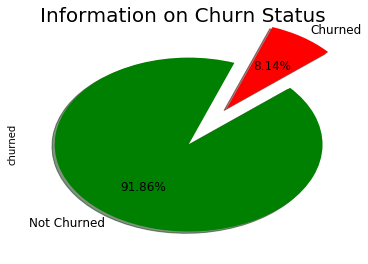

In [1866]:
# Let's see the distribution of chruned vs non-churned in a plot

colors = ['green', 'red']
label1 = list(['Not Churned','Churned'])
plt.suptitle('Information on Churn Status', fontsize=20)
churn_df_filter["churned"].value_counts().plot.pie(explode=[0,0.50], autopct='%1.2f%%',labels=label1, shadow=True, colors=colors, fontsize=12, startangle=70)

C:\Users\Naresh\Anaconda3\lib\site-packages\matplotlib\ticker.py:2198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


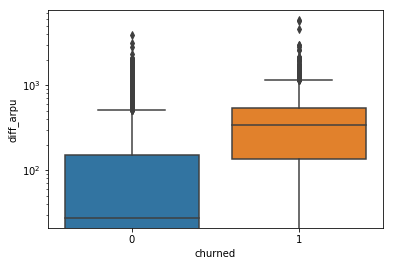

In [1867]:
fig, ax = plt.subplots()
# Set the scale of the x-and y-axes
ax.set(yscale="log")
sns.boxplot(x='churned',y='diff_arpu',data=churn_df_filter)

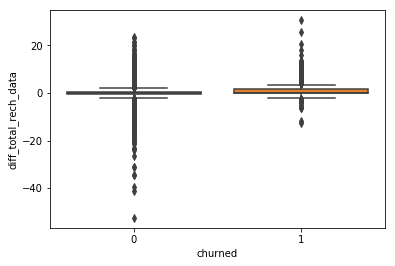

In [1868]:
sns.boxplot(x='churned',y='diff_total_rech_data',data=churn_df_filter)

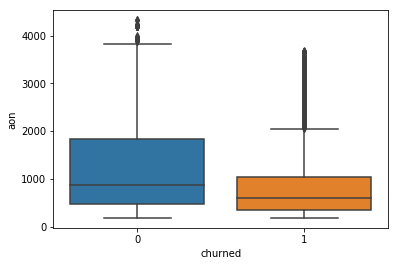

In [1869]:
sns.boxplot(x='churned',y='aon',data=churn_df_filter)

In [1870]:
churn_df_filter.describe()

,mobile_number,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,0.019666,0.011366,0.598947,0.477084,1209.368754,51.038561,30.193604,40.821499,1.875867,3.496209,7.002397,11.369818,0.497485,0.024707,18.870152,21.618470,26.326979,0.230060,48.175901,0.189627,-0.093772,0.294360,67.437332,3.425681,4.786084,1.253836,9.465908,1.244441,2.086271,0.185159,3.516089,13.430816,0.013898,0.331968,0.102418,1.812056,76.249725,10.598813,8.231159,0.138845,13.085794,19.896667,5.733648,5.041024,5.67505,0.025249,0.085180,0.012366,0.016049,-0.440484,28.752505,105.002230
std,6.908784e+05,0.138852,0.106007,0.490120,0.499483,957.677989,334.872298,308.732580,349.434879,65.972064,94.165532,138.240026,148.307654,14.046840,6.974350,213.766964,273.056033,303.760062,7.536744,427.952671,14.001292,18.088191,3.318372,502.630071,102.050813,134.931276,29.499721,180.801332,58.644216,74.416022,13.707215,98.256035,221.899925,0.174543,56.736299,9.582703,6.755899,418.479122,136.893018,145.251806,2.214561,148.249896,256.114913,624.877556,130.961478,116.36209,0.353771,1.867673,0.474128,0.871149,316.100529,1416.997574,1560.213721
min,7.000000e+09,0.000000,0.000000,0.000000,0.000000,180.000000,-12808.614000,-6359.920000,-12604.240000,-2330.200000,-3057.150000,-6412.690000,-3158.700000,-452.720000,-193.360000,-4619.970000,-4806.460000,-12685.460000,-209.940000,-12715.480000,-544.780000,-747.620000,-366.590000,-12768.700000,-3743.340000,-3159.400000,-1039.310000,-3485.370000,-3313.870000,-2978.660000,-1023.320000,-3321.390000,-3485.370000,-4.450000,-3163.690000,-459.280000,-130.500000,-14344.500000,-3949.000000,-3949.000000,-52.500000,-1805.000000,-8062.290000,-15646.390000,-3716.900000,-3027.37000,-3.500000,-26.500000,-7.000000,-36.000000,-8254.620000,-86866.500000,-92096.000000
25%,7.000609e+09,0.000000,0.000000,0.000000,0.000000,460.000000,-83.242000,-18.410000,-41.040000,0.000000,0.000000,-8.240000,-21.400000,-0.230000,0.000000,-30.120000,-0.500000,-4.160000,0.000000,-8.110000,0.000000,-1.310000,0.000000,-67.920000,-9.210000,-25.180000,-1.330000,-34.410000,-0.330000,-2.790000,0.000000,-4.990000,-44.280000,0.000000,0.000000,0.000000,-1.000000,-99.500000,-25.000000,-25.000000,0.000000,-9.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-168.000000
50%,7.001203e+09,0.000000,0.000000,1.000000,0.000000,846.000000,40.751000,3.210000,11.020000,0.000000,0.000000,1.030000,3.090000,0.000000,0.000000,4.950000,0.

In [1871]:
churn_df_filter.head()

,mobile_number,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action,aon,churned,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
0,7000842753,0,0,1,1,968,1,-7.703,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.00,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,0.0,0.0,9.97,7.55,0.00,0.00,0.0,0.0,0.0,0.0,20.20,0.0,55.0
7,7000701601,0,0,0,0,802,1,-1961.970,3.97,184.38,-6.78,-19.9,1.10,215.72,5.41,0.00,222.25,1.79,-8.31,-3.31,-9.84,-9.92,-4.25,0.0,198.22,17.89,98.33,87.28,203.52,-6.03,-32.11,21.01,-17.13,163.51,0.1,-23.29,0.32,-2.0,-2453.0,-395.0,-779.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,-38.68,0.0,-2453.0
8,7001524846,0,0,1,1,315,0,298.108,347.28,-48.84,0.00,0.0,244.87,25.23,0.00,-7.15,270.10,102.42,-63.83,0.00,38.59,0.00,-10.23,0.0,298.45,16.53,20.30,0.00,36.84,0.19,12.61,0.00,12.79,49.64,0.0,0.00,0.00,6.0,399.0,92.0,15.0,-2.0,19.5,177.97,363.54,-19.83,0.00,0.5,-2.5,0.0,0.0,495.37,-30.0,369.0
21,7002124215,0,0,0,0,720,0,-81.660,32.12,-156.09,0.00,0.0,-18.02,-14.94,-1.20,0.00,-34.18,50.15,-139.94,0.00,-89.80,0.00,0.00,0.0,-123.98,-13.20,-32.73,-6.67,-52.61,9.84,-48.78,0.00,-38.95,-91.55,0.0,0.00,0.00,-3.0,-78.0,0.0,-25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-78.0
23,7000887461,0,0,1,1,604,0,-232.846,16.23,-118.51,0.00,0.0,16.23,-65.58,0.00,-17.71,-49.34,0.00,-35.26,0.00,-35.26,0.00,-17.66,0.0,-102.27,-35.76,-42.20,-0.71,-78.69,-13.12,-35.25,0.00,-48.37,-127.09,0.0,10.38,-10.38,0.0,-212.0,-89.5,89.5,-1.0,-92.0,0.23,-710.38,-43.99,0.22,0.0,0.0,0.0,-1.0,-14.52,-184.0,-396.0


In [1872]:
# After several steps of data processing, we can now reset the indices
churn_df_filter.reset_index(drop=True, inplace=True)

In [1873]:
churn_df_filter.head()

,mobile_number,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action,aon,churned,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
0,7000842753,0,0,1,1,968,1,-7.703,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.00,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,0.0,0.0,9.97,7.55,0.00,0.00,0.0,0.0,0.0,0.0,20.20,0.0,55.0
1,7000701601,0,0,0,0,802,1,-1961.970,3.97,184.38,-6.78,-19.9,1.10,215.72,5.41,0.00,222.25,1.79,-8.31,-3.31,-9.84,-9.92,-4.25,0.0,198.22,17.89,98.33,87.28,203.52,-6.03,-32.11,21.01,-17.13,163.51,0.1,-23.29,0.32,-2.0,-2453.0,-395.0,-779.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,-38.68,0.0,-2453.0
2,7001524846,0,0,1,1,315,0,298.108,347.28,-48.84,0.00,0.0,244.87,25.23,0.00,-7.15,270.10,102.42,-63.83,0.00,38.59,0.00,-10.23,0.0,298.45,16.53,20.30,0.00,36.84,0.19,12.61,0.00,12.79,49.64,0.0,0.00,0.00,6.0,399.0,92.0,15.0,-2.0,19.5,177.97,363.54,-19.83,0.00,0.5,-2.5,0.0,0.0,495.37,-30.0,369.0
3,7002124215,0,0,0,0,720,0,-81.660,32.12,-156.09,0.00,0.0,-18.02,-14.94,-1.20,0.00,-34.18,50.15,-139.94,0.00,-89.80,0.00,0.00,0.0,-123.98,-13.20,-32.73,-6.67,-52.61,9.84,-48.78,0.00,-38.95,-91.55,0.0,0.00,0.00,-3.0,-78.0,0.0,-25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-78.0
4,7000887461,0,0,1,1,604,0,-232.846,16.23,-118.51,0.00,0.0,16.23,-65.58,0.00,-17.71,-49.34,0.00,-35.26,0.00,-35.26,0.00,-17.66,0.0,-102.27,-35.76,-42.20,-0.71,-78.69,-13.12,-35.25,0.00,-48.37,-127.09,0.0,10.38,-10.38,0.0,-212.0,-89.5,89.5,-1.0,-92.0,0.23,-710.38,-43.99,0.22,0.0,0.0,0.0,-1.0,-14.52,-184.0,-396.0


In [1874]:
# For now, let's remove the categorical columns
# We have already taken the categorical columns in a separate dataframe churn_df_cat
churn_df_filter.drop(columns=x, axis=1, inplace=True)
# After this churn_df_filter will contain only continuous data

C:\Users\Naresh\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1875]:
#Lets check the corelation between continous variables in the dataframe
Corr=churn_df_filter.corr()
Corr.style.background_gradient()

In [1876]:
# Now let's find some correlation figures and see if we can drop some columns which are highly correlated to others
# Find lower triangle for corr (where we have high -ve or +ve correlations)
# This will help in reducing the dimensions of the dataset to an extent
cor = churn_df_filter.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)].sort_values()

diff_total_rech_num   diff_arpu                0.550359
diff_std_og_mou       diff_arpu                0.555102
diff_roam_og_mou      diff_roam_ic_mou         0.562620
diff_offnet_mou       diff_arpu                0.564326
diff_total_rech_amt   diff_total_og_mou        0.584771
diff_arpu_2g          diff_vol_3g_mb           0.596348
diff_vol_3g_mb        diff_av_rech_amt_data    0.606403
diff_total_data_rech  diff_av_rech_amt_data    0.617421
diff_arpu_3g          diff_vol_3g_mb           0.619354
diff_loc_ic_mou       diff_loc_ic_t2t_mou      0.625673
diff_std_og_mou       diff_onnet_mou           0.633463
diff_total_og_mou     diff_arpu                0.636571
diff_std_ic_mou       diff_std_ic_t2t_mou      0.637053
diff_total_og_mou     diff_std_og_t2t_mou      0.640481
diff_amt_data         diff_av_rech_amt_data    0.645117
diff_monthly_3g       diff_av_rech_amt_data    0.647315
diff_amt_data         diff_total_rech_data     0.653946
diff_total_data_rech  diff_total_rech_data     0

##### We see a considerable correlation among the columns, but we can assume that PCA will take care of the correlations

### Outlier Treatment

In [1877]:
# Checking the outliers in the data now
churn_df_filter.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,mobile_number,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,1209.368754,51.038561,30.193604,40.821499,1.875867,3.496209,7.002397,11.369818,0.497485,0.024707,18.870152,21.618470,26.326979,0.230060,48.175901,0.189627,-0.093772,0.294360,67.437332,3.425681,4.786084,1.253836,9.465908,1.244441,2.086271,0.185159,3.516089,13.430816,0.013898,0.331968,0.102418,1.812056,76.249725,10.598813,8.231159,0.138845,13.085794,19.896667,5.733648,5.041024,5.67505,0.025249,0.085180,0.012366,0.016049,-0.440484,28.752505,105.002230
std,6.908784e+05,957.677989,334.872298,308.732580,349.434879,65.972064,94.165532,138.240026,148.307654,14.046840,6.974350,213.766964,273.056033,303.760062,7.536744,427.952671,14.001292,18.088191,3.318372,502.630071,102.050813,134.931276,29.499721,180.801332,58.644216,74.416022,13.707215,98.256035,221.899925,0.174543,56.736299,9.582703,6.755899,418.479122,136.893018,145.251806,2.214561,148.249896,256.114913,624.877556,130.961478,116.36209,0.353771,1.867673,0.474128,0.871149,316.100529,1416.997574,1560.213721
min,7.000000e+09,180.000000,-12808.614000,-6359.920000,-12604.240000,-2330.200000,-3057.150000,-6412.690000,-3158.700000,-452.720000,-193.360000,-4619.970000,-4806.460000,-12685.460000,-209.940000,-12715.480000,-544.780000,-747.620000,-366.590000,-12768.700000,-3743.340000,-3159.400000,-1039.310000,-3485.370000,-3313.870000,-2978.660000,-1023.320000,-3321.390000,-3485.370000,-4.450000,-3163.690000,-459.280000,-130.500000,-14344.500000,-3949.000000,-3949.000000,-52.500000,-1805.000000,-8062.290000,-15646.390000,-3716.900000,-3027.37000,-3.500000,-26.500000,-7.000000,-36.000000,-8254.620000,-86866.500000,-92096.000000
25%,7.000609e+09,460.000000,-83.242000,-18.410000,-41.040000,0.000000,0.000000,-8.240000,-21.400000,-0.230000,0.000000,-30.120000,-0.500000,-4.160000,0.000000,-8.110000,0.000000,-1.310000,0.000000,-67.920000,-9.210000,-25.180000,-1.330000,-34.410000,-0.330000,-2.790000,0.000000,-4.990000,-44.280000,0.000000,0.000000,0.000000,-1.000000,-99.500000,-25.000000,-25.000000,0.000000,-9.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-168.000000
50%,7.001203e+09,846.000000,40.751000,3.210000,11.020000,0.000000,0.000000,1.030000,3.090000,0.000000,0.000000,4.950000,0.000000,0.030000,0.000000,0.400000,0.000000,0.000000,0.000000,14.630000,1.040000,2.160000,0.000000,3.940000,0.000000,0.220000,0.000000,0.640000,5.610000,0.000000,0.000000,0.000000,1.500000,57.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0000

- There are some high value customers appearing as outliers
- Let's cap data at 99%

In [1878]:
churn_df_filter.isnull().sum().sum()

0

In [1879]:
churn_df_cap99 = churn_df_filter.copy()

In [1880]:
churn_df_cap99 = churn_df_cap99.drop(['mobile_number', 'churned'], axis=1)

In [1881]:
churn_df_cap99 = churn_df_cap99[churn_df_cap99.apply(lambda x: x <= x.quantile(.99))]

In [1882]:
churn_df_cap99.describe()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data
count,29933.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29703.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29701.000000,29713.000000,29701.000000,29701.000000,29702.000000,29701.000000,29706.000000,29701.000000,29745.000000,29706.000000,29701.000000,29701.000000,29701.000000,29701.000000,29771.000000,29721.000000,29835.000000,29752.000000,29701.000000,29701.000000,29701.000000
mean,1203.151238,37.871394,14.115122,23.509000,-1.608253,-1.526202,-0.611765,3.555409,-0.164044,-0.281409,7.928077,6.383745,10.073327,-0.196309,26.996441,-0.438254,-0.799626,0.210511,44.511981,-1.783058,-2.073688,-0.347108,0.247875,-1.457792,-1.563700,-0.416513,-1.499828,2.346267,0.007926,-2.102969,-0.327202,1.503872,59.711070,3.200734,1.497727,0.052782,6.653541,6.866999,-24.127636,-1.381754,0.079690,0.013302,0.002052,-0.001827,-0.019814,-15.810621,-26.101948,45.469060
std,949.772131,304.335567,259.317873,298.665284,52.783499,76.325045,107.018102,121.282526,9.267874,5.611619,179.572369,221.809432,250.080272,5.100480,367.988667,9.564863,14.982597,2.673426,444.478939,79.996330,110.889420,22.052382,150.289993,42.459903,57.330871,10.850069,76.723719,185.907404,0.118917,37.852147,6.647684,5.897244,379.964006,111.722300,125.655781,1.995369,131.313661,215.683453,529.487598,111.316802,99.219792,0.327306,1.644031,0.430422,0.736664,268.888883,1245.466205,1383.389301
min,180.000000,-12808.614000,-6359.920000,-12604.240000,-2330.200000,-3057.150000,-6412.690000,-3158.700000,-452.720000,-193.360000,-4619.970000,-4806.460000,-12685.460000,-209.940000,-12715.480000,-544.780000,-747.620000,-366.590000,-12768.700000,-3743.340000,-3159.400000,-1039.310000,-3485.370000,-3313.870000,-2978.660000,-1023.320000,-3321.390000,-3485.370000,-4.450000,-3163.690000,-459.280000,-130.500000,-14344.500000,-3949.000000,-3949.000000,-52.500000,-1805.000000,-8062.290000,-15646.390000,-3716.900000,-3027.370000,-3.500000,-26.500000,-7.000000,-36.000000,-8254.620000,-86866.500000,-92096.000000
25%,459.000000,-84.585000,-19.020000,-42.210000,0.000000,0.000000,-8.500000,-21.930000,-0.250000,0.000000,-30.710000,-0.580000,-4.410000,0.000000,-8.490000,0.000000,-1.370000,0.000000,-69.900000,-9.430000,-25.630000,-1.380000,-34.960000,-0.370000,-2.910000,0.000000,-5.200000,-45.050000,0.000000,0.000000,0.000000,-1.000000,-101.000000,-25.000000,-25.000000,0.000000,-11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-171.500000
50%,844.000000,38.249000,2.880000,10.160000,0.000000,0.000000,0.890000,2.750000,0.000000,0.000000,4.360000,0.000000,0.000000,0.000000,0.320000,0.000000,0.000000,0.000000,13.320000,0.920000,1.840000,0.000000,3.380000,0.000000,0.180000,0.000000,0.550000,4.910000,0.000000,0.000000,0.000000,1.500000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.000000
75%,1740.000000,173.909000,48.970000,96.2

In [1883]:
churn_df_cap99 = pd.concat([churn_df_cap99, churn_df_filter[['mobile_number','churned']]], axis=1)
churn_df_cap99.head()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,mobile_number,churned
0,968.0,-7.703,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.00,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,0.0,0.0,9.97,7.55,0.00,0.00,0.0,0.0,0.0,0.0,20.20,0.0,55.0,7000842753,1
1,802.0,-1961.970,3.97,184.38,-6.78,-19.9,1.10,215.72,5.41,0.00,222.25,1.79,-8.31,-3.31,-9.84,-9.92,-4.25,0.0,198.22,17.89,98.33,NaN,203.52,-6.03,-32.11,21.01,-17.13,163.51,0.1,-23.29,0.32,-2.0,-2453.0,-395.0,-779.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,-38.68,0.0,-2453.0,7000701601,1
2,315.0,298.108,347.28,-48.84,0.00,0.0,244.87,25.23,0.00,-7.15,270.10,102.42,-63.83,0.00,38.59,0.00,-10.23,0.0,298.45,16.53,20.30,0.00,36.84,0.19,12.61,0.00,12.79,49.64,0.0,0.00,0.00,6.0,399.0,92.0,15.0,-2.0,19.5,177.97,363.54,-19.83,0.00,0.5,-2.5,0.0,0.0,495.37,-30.0,369.0,7001524846,0
3,720.0,-81.660,32.12,-156.09,0.00,0.0,-18.02,-14.94,-1.20,0.00,-34.18,50.15,-139.94,0.00,-89.80,0.00,0.00,0.0,-123.98,-13.20,-32.73,-6.67,-52.61,9.84,-48.78,0.00,-38.95,-91.55,0.0,0.00,0.00,-3.0,-78.0,0.0,-25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-78.0,7002124215,0
4,604.0,-232.846,16.23,-118.51,0.00,0.0,16.23,-65.58,0.00,-17.71,-49.34,0.00,-35.26,0.00,-35.26,0.00,-17.66,0.0,-102.27,-35.76,-42.20,-0.71,-78.69,-13.12,-35.25,0.00,-48.37,-127.09,0.0,10.38,-10.38,0.0,-212.0,-89.5,89.5,-1.0,-92.0,0.23,-710.38,-43.99,0.22,0.0,0.0,0.0,-1.0,-14.52,-184.0,-396.0,7000887461,0


In [1884]:
churn_df_filter = churn_df_cap99[~(churn_df_cap99.isnull().any(axis=1))]

In [1885]:
churn_df_filter.reset_index(drop=True, inplace=True)

In [1886]:
churn_df_filter.isnull().any().any()

False

In [1887]:
churn_df_filter.shape

(23088, 50)

In [1888]:
# Standardize continuous variables using sklearn standard scaler before we apply PCA
from sklearn import preprocessing
churn_scaler = preprocessing.StandardScaler().fit(churn_df_filter.drop(['mobile_number','churned'], axis=1))
churn_df_std = churn_scaler.transform(churn_df_filter.drop(['mobile_number','churned'], axis=1)) 

In [1889]:
churn_df_filter.head()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,mobile_number,churned
0,968.0,-7.703,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,-0.16,-4.13,-1.15,-5.44,0.00,0.00,0.0,0.00,-5.44,0.0,0.00,0.00,1.5,55.0,0.0,0.0,0.0,0.0,9.97,7.55,0.00,0.00,0.0,0.0,0.0,0.0,20.20,0.0,55.0,7000842753,1
1,315.0,298.108,347.28,-48.84,0.0,0.0,244.87,25.23,0.0,-7.15,270.10,102.42,-63.83,0.0,38.59,0.0,-10.23,0.0,298.45,16.53,20.30,0.00,36.84,0.19,12.61,0.0,12.79,49.64,0.0,0.00,0.00,6.0,399.0,92.0,15.0,-2.0,19.5,177.97,363.54,-19.83,0.00,0.5,-2.5,0.0,0.0,495.37,-30.0,369.0,7001524846,0
2,720.0,-81.660,32.12,-156.09,0.0,0.0,-18.02,-14.94,-1.2,0.00,-34.18,50.15,-139.94,0.0,-89.80,0.0,0.00,0.0,-123.98,-13.20,-32.73,-6.67,-52.61,9.84,-48.78,0.0,-38.95,-91.55,0.0,0.00,0.00,-3.0,-78.0,0.0,-25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,-78.0,7002124215,0
3,604.0,-232.846,16.23,-118.51,0.0,0.0,16.23,-65.58,0.0,-17.71,-49.34,0.00,-35.26,0.0,-35.26,0.0,-17.66,0.0,-102.27,-35.76,-42.20,-0.71,-78.69,-13.12,-35.25,0.0,-48.37,-127.09,0.0,10.38,-10.38,0.0,-212.0,-89.5,89.5,-1.0,-92.0,0.23,-710.38,-43.99,0.22,0.0,0.0,0.0,-1.0,-14.52,-184.0,-396.0,7000887461,0
4,1155.0,31.361,-231.90,-28.09,0.0,0.0,14.12,6.02,0.0,0.00,20.14,-246.02,-34.10,0.0,-280.13,0.0,0.00,0.0,-259.99,8.88,-0.70,0.00,8.18,6.36,-3.15,0.0,3.21,19.73,0.0,8.34,0.00,18.5,112.0,-60.0,-110.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,112.0,7000815202,0


In [1890]:
churn_df_std = pd.DataFrame(churn_df_std)

In [1891]:
churn_df_std = pd.concat([churn_df_std, churn_df_filter[['mobile_number','churned']]], axis=1)

In [1892]:
churn_df_std.reset_index(drop=True, inplace=True)

In [1893]:
churn_df_std.shape

(23088, 50)

In [1894]:
churn_df_filter.columns

Index(['aon', 'diff_arpu', 'diff_onnet_mou', 'diff_offnet_mou',
       'diff_roam_ic_mou', 'diff_roam_og_mou', 'diff_loc_og_t2t_mou',
       'diff_loc_og_t2m_mou', 'diff_loc_og_t2f_mou', 'diff_loc_og_t2c_mou',
       'diff_loc_og_mou', 'diff_std_og_t2t_mou', 'diff_std_og_t2m_mou',
       'diff_std_og_t2f_mou', 'diff_std_og_mou', 'diff_isd_og_mou',
       'diff_spl_og_mou', 'diff_og_others', 'diff_total_og_mou',
       'diff_loc_ic_t2t_mou', 'diff_loc_ic_t2m_mou', 'diff_loc_ic_t2f_mou',
       'diff_loc_ic_mou', 'diff_std_ic_t2t_mou', 'diff_std_ic_t2m_mou',
       'diff_std_ic_t2f_mou', 'diff_std_ic_mou', 'diff_total_ic_mou',
       'diff_spl_ic_mou', 'diff_isd_ic_mou', 'diff_ic_others',
       'diff_total_rech_num', 'diff_total_rech_amt', 'diff_max_rech_amt',
       'diff_last_day_rch_amt', 'diff_total_rech_data',
       'diff_av_rech_amt_data', 'diff_vol_2g_mb', 'diff_vol_3g_mb',
       'diff_arpu_3g', 'diff_arpu_2g', 'diff_monthly_2g', 'diff_sachet_2g',
       'diff_monthly_3g', 'dif

In [1895]:
# Take the continuous columns in a list and remove the label column since PCA is a an unsupervised approach
churn_df_filter_cols = list(churn_df_filter.columns)
#churn_df_filter_cols.remove('churned')

In [1896]:
# After standard scaling, churn_df_std does not contain columns, we can set those 
churn_df_std.columns = churn_df_filter_cols

In [1897]:
churn_df_std.head()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,mobile_number,churned
0,-0.260646,-0.045011,-0.004723,-0.018182,0.002632,0.000406,0.017859,-0.000650,0.032052,0.064823,0.011399,-0.012901,-0.026393,0.045003,-0.026567,0.041342,0.084538,-0.07539,-0.014793,0.030887,0.003555,-0.021883,0.015439,0.030959,0.035992,0.035744,0.050327,0.045496,-0.052949,0.052772,0.050615,0.103564,0.126764,0.019087,0.001994,0.016840,-0.004266,0.027605,0.086155,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.146889,0.050313,0.075618,7000842753,1
1,-0.944422,1.120553,1.443818,-0.189564,0.002632,0.000406,2.703181,0.213925,0.032052,-1.295309,1.677547,0.459397,-0.285727,0.045003,0.086459,0.041342,-0.674707,-0.07539,0.731923,0.262949,0.237616,0.031052,0.323790,0.036218,0.308916,0.035744,0.254565,0.387373,-0.052949,0.052772,0.050615,0.906392,1.170496,0.977929,0.133509,-0.987829,0.149564,0.797472,0.780228,-0.150570,0.019587,1.511280,-1.470716,0.016615,0.030682,1.963141,0.027496,0.295612,7001524846,0
2,-0.520334,-0.326890,0.129253,-0.565910,0.002632,0.000406,-0.179754,-0.127710,-0.097876,0.064823,-0.199445,0.218360,-0.594953,0.045003,-0.289580,0.041342,0.084538,-0.07539,-0.324989,-0.150425,-0.270458,-0.275972,-0.328574,0.303339,-1.019774,0.035744,-0.571650,-0.488981,-0.052949,0.052772,0.050615,-0.699263,-0.276771,0.019087,-0.217197,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,-0.017564,7002124215,0
3,-0.641801,-0.903118,0.062974,-0.434040,0.002632,0.000406,0.195842,-0.558390,0.032052,-3.304118,-0.292961,-0.012901,-0.169650,0.045003,-0.129839,0.041342,-1.226143,-0.07539,-0.270671,-0.464105,-0.361189,-0.001630,-0.518777,-0.332215,-0.726938,0.035744,-0.722074,-0.709575,-0.052949,0.365914,-1.598297,-0.164045,-0.683341,-0.913701,0.786697,-0.485494,-0.730026,-0.017029,-1.313592,-0.375833,0.021868,-0.027255,0.007916,0.016615,-1.358299,0.014178,-0.089633,-0.240360,7000887461,0
4,-0.064833,0.103877,-0.972003,-0.116752,0.002632,0.000406,0.172703,0.050549,0.032052,0.064823,0.135635,-1.147396,-0.164937,0.045003,-0.847033,0.041342,0.084538,-0.07539,-0.665284,0.156581,0.036418,0.031052,0.114771,0.207010,-0.032185,0.035744,0.101586,0.201724,-0.052949,0.304371,0.050615,3.136468,0.299708,-0.606246,-0.962445,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,0.115554,7000815202,0


In [1898]:
churn_df_std[['churned']].head()

,churned
0,1
1,0
2,0
3,0
4,0


In [1899]:
# Treating categorical columns for inputting to PCA
churn_df_cat = churn_df_cat.astype('object')
churn_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
night_pck_user_good      30001 non-null object
night_pck_user_action    30001 non-null object
fb_user_good             30001 non-null object
fb_user_action           30001 non-null object
mobile_number            30001 non-null object
churned                  30001 non-null object
dtypes: object(6)
memory usage: 2.9+ MB


In [1900]:
churn_df_cat.reset_index(drop=True,inplace=True)

In [1901]:
churn_df_std.reset_index(drop=True,inplace=True)

In [1902]:
churn_df_cat.columns

Index(['night_pck_user_good', 'night_pck_user_action', 'fb_user_good',
       'fb_user_action', 'mobile_number', 'churned'],
      dtype='object')

In [1903]:
churn_df_cat['mobile_number'] = churn_df_cat['mobile_number'].astype('int64')

In [1904]:
churn_df_std = pd.merge(churn_df_std, churn_df_cat, on=['mobile_number', 'churned'], how = 'inner')

In [1905]:
churn_df_std.shape

(23088, 54)

In [1906]:
churn_df_cat['fb_user_good'].isnull().sum()

0

In [1907]:
churn_df_std[['fb_user_good','fb_user_action','night_pck_user_good', 'night_pck_user_action']].isnull().sum()

fb_user_good             0
fb_user_action           0
night_pck_user_good      0
night_pck_user_action    0
dtype: int64

In [1908]:
churn_df_std.isnull().any().any()

False

In [1909]:
churn_df_filter.shape

(23088, 50)

In [1910]:
# We do not need mobile numbers to be inputted to PCA
churn_df_std.drop(columns=['mobile_number', 'churned'], inplace=True)

In [1911]:
churn_df_std.head(10)

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action
0,-0.260646,-0.045011,-0.004723,-0.018182,0.002632,0.000406,0.017859,-0.000650,0.032052,0.064823,0.011399,-0.012901,-0.026393,0.045003,-0.026567,0.041342,0.084538,-0.075390,-0.014793,0.030887,0.003555,-0.021883,0.015439,0.030959,0.035992,0.035744,0.050327,0.045496,-0.052949,0.052772,0.050615,0.103564,0.126764,0.019087,0.001994,0.016840,-0.004266,0.027605,0.086155,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.146889,0.050313,0.075618,0,0,1,1
1,-0.944422,1.120553,1.443818,-0.189564,0.002632,0.000406,2.703181,0.213925,0.032052,-1.295309,1.677547,0.459397,-0.285727,0.045003,0.086459,0.041342,-0.674707,-0.075390,0.731923,0.262949,0.237616,0.031052,0.323790,0.036218,0.308916,0.035744,0.254565,0.387373,-0.052949,0.052772,0.050615,0.906392,1.170496,0.977929,0.133509,-0.987829,0.149564,0.797472,0.780228,-0.150570,0.019587,1.511280,-1.470716,0.016615,0.030682,1.963141,0.027496,0.295612,0,0,1,1
2,-0.520334,-0.326890,0.129253,-0.565910,0.002632,0.000406,-0.179754,-0.127710,-0.097876,0.064823,-0.199445,0.218360,-0.594953,0.045003,-0.289580,0.041342,0.084538,-0.075390,-0.324989,-0.150425,-0.270458,-0.275972,-0.328574,0.303339,-1.019774,0.035744,-0.571650,-0.488981,-0.052949,0.052772,0.050615,-0.699263,-0.276771,0.019087,-0.217197,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,-0.017564,0,0,0,0
3,-0.641801,-0.903118,0.062974,-0.434040,0.002632,0.000406,0.195842,-0.558390,0.032052,-3.304118,-0.292961,-0.012901,-0.169650,0.045003,-0.129839,0.041342,-1.226143,-0.075390,-0.270671,-0.464105,-0.361189,-0.001630,-0.518777,-0.332215,-0.726938,0.035744,-0.722074,-0.709575,-0.052949,0.365914,-1.598297,-0.164045,-0.683341,-0.913701,0.786697,-0.485494,-0.730026,-0.017029,-1.313592,-0.375833,0.021868,-0.027255,0.007916,0.016615,-1.358299,0.014178,-0.089633,-0.240360,0,0,1,1
4,-0.064833,0.103877,-0.972003,-0.116752,0.002632,0.000406,0.172703,0.050549,0.032052,0.064823,0.135635,-1.147396,-0.164937,0.045003,-0.847033,0.041342,0.084538,-0.075390,-0.665284,0.156581,0.036418,0.031052,0.114771,0.207010,-0.032185,0.035744,0.101586,0.201724,-0.052949,0.304371,0.050615,3.136468,0.299708,-0.606246,-0.962445,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,0.115554,0,0,0,0
5,-0.510910,0.052126,-0.054067,0.075825,0.002632,0.000406,-0.111873,0.283324,-0.163922,-0.787399,0.133230,-0.012901,-0.034234,0.045003,-0.032219,0.041342,-0.091358,0.350836,0.026690,-0.190191,0.164322,0.037496,0.031338,0.030959,0.035992,0.035744,0.050327,0.059090,0.115961,0.052772,0.050615,-1.323685,0.093389,0.665263,0.001994,-4.504172,-0.761581,-1.104054,1.632227,-0.042414,-0.104330,3.049814,-5.906611,0.016615,0.030682,2.820105,-3.214066,-2.939139,0,0,1,1
6,-0.089964,0.163480,0.130838,-0.120647,0.002632,0.000406,0.374264,-0.294063,0.732578,0.064823,0.038973,-0.012901,-0.026068,-0.206737,-0.029993,0.041342,0.181021,0.411187,-0.000057,0.018095,-1.664859,2.632240,-0.840766,-0.002258,-0.017251,-2.628088,-0.448851,-0.774437,-0.052949,0.272394,1.524787,0.906392,0.157105,0.019087,-0.524064,0.26

#### Now we are good to apply PCA

# PCA for Feature extraction

In [1912]:
# Before applying PCA, let's see if any of the columns seem to be different
pd.set_option('display.max_rows', 200)
churn_df_std.dtypes

aon                      float64
diff_arpu                float64
diff_onnet_mou           float64
diff_offnet_mou          float64
diff_roam_ic_mou         float64
diff_roam_og_mou         float64
diff_loc_og_t2t_mou      float64
diff_loc_og_t2m_mou      float64
diff_loc_og_t2f_mou      float64
diff_loc_og_t2c_mou      float64
diff_loc_og_mou          float64
diff_std_og_t2t_mou      float64
diff_std_og_t2m_mou      float64
diff_std_og_t2f_mou      float64
diff_std_og_mou          float64
diff_isd_og_mou          float64
diff_spl_og_mou          float64
diff_og_others           float64
diff_total_og_mou        float64
diff_loc_ic_t2t_mou      float64
diff_loc_ic_t2m_mou      float64
diff_loc_ic_t2f_mou      float64
diff_loc_ic_mou          float64
diff_std_ic_t2t_mou      float64
diff_std_ic_t2m_mou      float64
diff_std_ic_t2f_mou      float64
diff_std_ic_mou          float64
diff_total_ic_mou        float64
diff_spl_ic_mou          float64
diff_isd_ic_mou          float64
diff_ic_ot

In [1913]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = churn_df_std

# Putting response variable to y
y = churn_df_filter['churned'].astype('int')

y.head()

0    1
1    0
2    0
3    0
4    0
Name: churned, dtype: int32

In [1914]:
churn_df_std.shape

(23088, 52)

In [1915]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [1916]:
pd.DataFrame(y_train).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16161 entries, 5873 to 5640
Data columns (total 1 columns):
churned    16161 non-null int32
dtypes: int32(1)
memory usage: 189.4 KB


In [1917]:
X_train.shape, y_train.shape

((16161, 52), (16161,))

In [1918]:
sum(y_train==1), sum(y_train==0)

(965, 15196)

In [1919]:
# Let's apply SMOTE to handle Class imbalance issue
from imblearn.over_sampling import SMOTE

In [1920]:
sm = SMOTE(random_state=2)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())

In [1921]:
X_train_sm.shape, y_train_sm.shape

((30392, 52), (30392,))

In [1922]:
sum(y_train_sm==1), sum(y_train_sm==0)

(15196, 15196)

In [1923]:
X_train.head()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action
5873,-0.010382,-0.036793,0.004995,0.014487,0.002632,0.000406,0.043410,0.075043,0.051541,-2.881812,0.081722,-0.012901,-0.026393,0.045003,-0.026567,0.041342,-0.999780,1.029781,-0.015519,0.048406,-0.204158,0.045782,-0.122764,0.030959,0.061531,0.002928,0.063741,-0.068338,-1.235316,0.052772,0.041084,-0.342451,-0.024941,0.019087,0.133509,1.775012,0.685996,-0.504108,0.395767,0.388533,0.514008,-0.027255,1.190821,0.016615,2.114153,0.081260,1.333779,1.222879,0,0,1,1
11762,0.287003,-0.529591,0.122329,0.335880,0.002632,0.000406,0.163382,1.097142,-0.323083,0.064823,0.869209,0.066414,-0.127599,0.045003,-0.049148,0.041342,0.084538,-0.075390,0.313867,0.216230,0.203891,-0.673676,0.161957,0.130333,-0.753993,0.035744,-0.475040,-0.160263,-3.093321,-0.290235,-1.313947,0.014361,-0.257050,-0.439490,0.001994,0.016840,0.121953,-4.336258,0.071435,0.034321,-0.386175,-3.104324,0.599368,0.016615,0.030682,0.069678,0.141581,0.071064,0,0,1,1
18322,0.026268,0.559593,-1.566760,-0.128121,0.002632,0.000406,-0.240946,-0.056951,0.111091,0.703989,-0.170514,-1.630947,-0.158152,0.045003,-1.149263,0.041342,0.557304,-0.037671,-1.031449,-0.196309,-0.316063,0.031052,-0.338712,-0.116304,0.012834,0.035744,-0.051553,-0.295574,-0.052949,0.052772,0.050615,-0.520857,-0.000668,1.301018,0.571890,-1.741331,-1.140239,1.481141,0.131271,0.041967,-0.173287,-1.565789,-1.766442,0.016615,0.030682,0.069984,-0.788599,-0.726589,0,0,1,1
20965,-0.978977,0.599777,0.018635,0.273068,0.002632,0.000406,0.079270,0.705244,0.032052,0.064823,0.557940,-0.012901,-0.026393,0.045003,-0.026567,0.041342,0.084538,-0.075390,0.206882,0.269206,0.091220,0.066956,0.221322,0.030959,0.035992,0.035744,0.050327,0.220718,-0.052949,0.052772,0.050615,0.727985,0.507544,1.040463,0.208034,0.268008,1.155373,0.068848,1.534937,2.012554,2.219699,-3.104324,0.303642,2.421625,0.030682,2.211630,0.295217,0.389145,0,0,1,1
20342,0.939365,-0.857747,-0.101701,-0.208162,0.072681,0.041489,-0.184689,0.176929,-0.497403,0.587950,-0.003837,-0.034944,-0.332734,-0.017429,-0.262341,0.041342,0.258207,-0.075390,-0.216528,0.665338,0.585019,1.646265,1.055210,-0.140386,-1.146388,0.875430,-0.781956,0.606912,-0.052949,0.052772,0.050615,0.817189,-1.152110,-0.262313,-2.189914,1.523844,-1.266458,-0.927397,0.864806,-1.943911,-2.358882,-0.027255,2.373726,-2.388396,0.030682,1.009816,0.138539,-0.138420,0,0,1,1


In [1924]:
# Have a look at distribution of churned vs non-churned in train set
y_train_df = pd.DataFrame(y_train_sm, columns=['churned'])
y_train_df.groupby('churned').size()

churned
0    15196
1    15196
dtype: int64

In [1925]:
# Have a look at distribution of churned vs non-churned in test set
y_test_df = pd.DataFrame(y_test)
y_test_df.groupby('churned').size()

churned
0    6504
1     423
dtype: int64

For now, the distribution looks ok in test and train dataset

In [1926]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=100)

In [1927]:
#Doing the PCA on the train data
pca.fit(X_train_sm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [1928]:
#Let's plot the principal components and try to make sense of them
#We'll plot original features on the first 2 principal components as axes

In [1929]:
pca.components_

array([[  4.38975630e-02,  -3.22280744e-01,  -2.55732867e-01, ...,
          1.49041746e-03,   3.03585398e-02,   5.88858098e-02],
       [  1.23603836e-02,  -4.19675808e-02,   1.68018516e-01, ...,
          3.02591171e-03,  -5.82912518e-02,   3.52827313e-02],
       [ -4.38801727e-02,   4.50049460e-02,   2.72262359e-01, ...,
         -3.61123249e-04,  -2.03251390e-02,   5.04191771e-03],
       ..., 
       [ -1.05999195e-07,   2.12292538e-07,  -5.03657946e-06, ...,
         -2.74144165e-06,   7.25600243e-07,   1.23082158e-07],
       [  6.39077131e-17,   3.80944658e-16,  -1.13721632e-15, ...,
          1.82438318e-16,  -1.39690406e-17,  -5.33074611e-17],
       [ -8.36135589e-17,  -2.45163922e-17,  -6.23728951e-16, ...,
         -4.41052970e-17,  -3.40049716e-17,   7.49301152e-17]])

In [1930]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.043898,0.012360,aon
1,-0.322281,-0.041968,diff_arpu
2,-0.255733,0.168019,diff_onnet_mou
3,-0.257497,0.102876,diff_offnet_mou
4,0.027165,-0.047747,diff_roam_ic_mou


In [1931]:
pcs_df_sort = pcs_df.sort_values(by=['PC1'], ascending=False)
pcs_df_sort.head()

,PC1,PC2,Feature
51,0.058886,0.035283,fb_user_action
0,0.043898,0.012360,aon
50,0.030359,-0.058291,fb_user_good
4,0.027165,-0.047747,diff_roam_ic_mou
49,0.001490,0.003026,night_pck_user_action


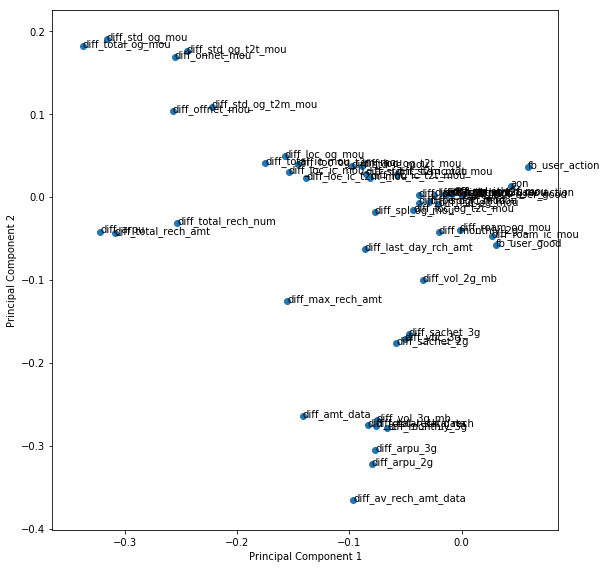

In [1932]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

#### Let's capture the scree plot now to see how many principal components shall be required to capture the required vairance


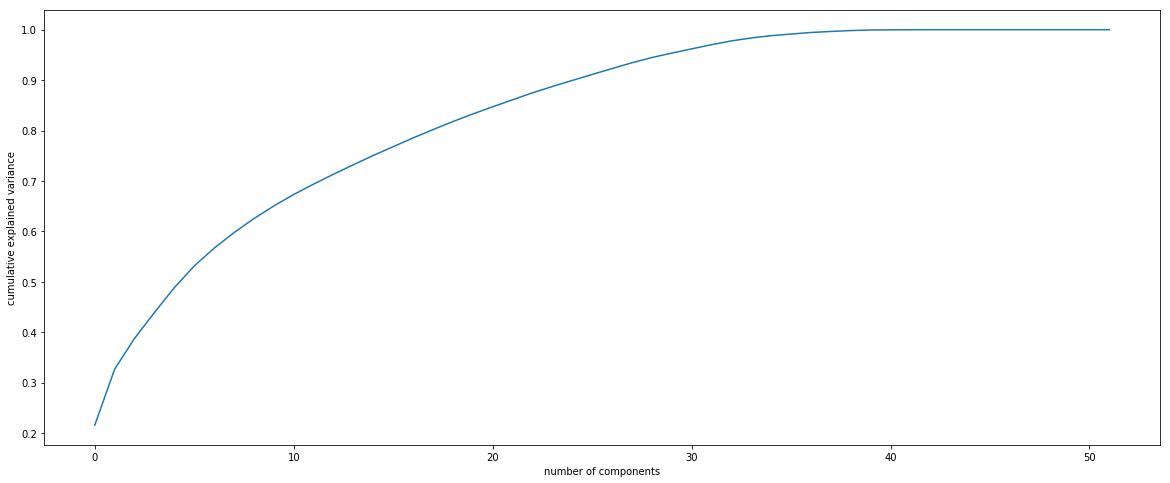

In [1933]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (20,8))
line2d = plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
xvalues = line2d[0].get_xdata()
yvalues = line2d[0].get_ydata()
plt.show()

In [1934]:
# We are interested in knowing the number of principal components that capture more than 80% of variance
# Since the plot does not show exact no. of components that capture particular %-age of vairance, let's check the 
# cumulative variance for first 50 principal components
for i in range(1, 50):
    idx = np.where(xvalues==xvalues[i])
    print("cumulative variance for {} components = {}".format(i,yvalues[idx]))

cumulative variance for 1 components = [ 0.32704429]
cumulative variance for 2 components = [ 0.38799388]
cumulative variance for 3 components = [ 0.43923921]
cumulative variance for 4 components = [ 0.48859682]
cumulative variance for 5 components = [ 0.53155161]
cumulative variance for 6 components = [ 0.56673489]
cumulative variance for 7 components = [ 0.59764825]
cumulative variance for 8 components = [ 0.62549687]
cumulative variance for 9 components = [ 0.65051769]
cumulative variance for 10 components = [ 0.6732168]
cumulative variance for 11 components = [ 0.69378498]
cumulative variance for 12 components = [ 0.7133651]
cumulative variance for 13 components = [ 0.73224365]
cumulative variance for 14 components = [ 0.75061504]
cumulative variance for 15 components = [ 0.76804253]
cumulative variance for 16 components = [ 0.7853268]
cumulative variance for 17 components = [ 0.80185803]
cumulative variance for 18 components = [ 0.81780236]
cumulative variance for 19 components = 

#### We see that 25 components are enough to explain 90% of the variance. Hence we will chose the same  number

In [1935]:
#Using incremental PCA for 25 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [1936]:
#Basis transformation
X_train_pca = pca_final.fit_transform(X_train_sm)
X_train_pca.shape

(30392, 25)

In [1937]:
# Let's create the correlation matrix for the principal components
# Since the PCs are expected to be orthogonal and independed, we expect zero to very minor correlation among them
corrmat = np.corrcoef(X_train_pca.transpose())

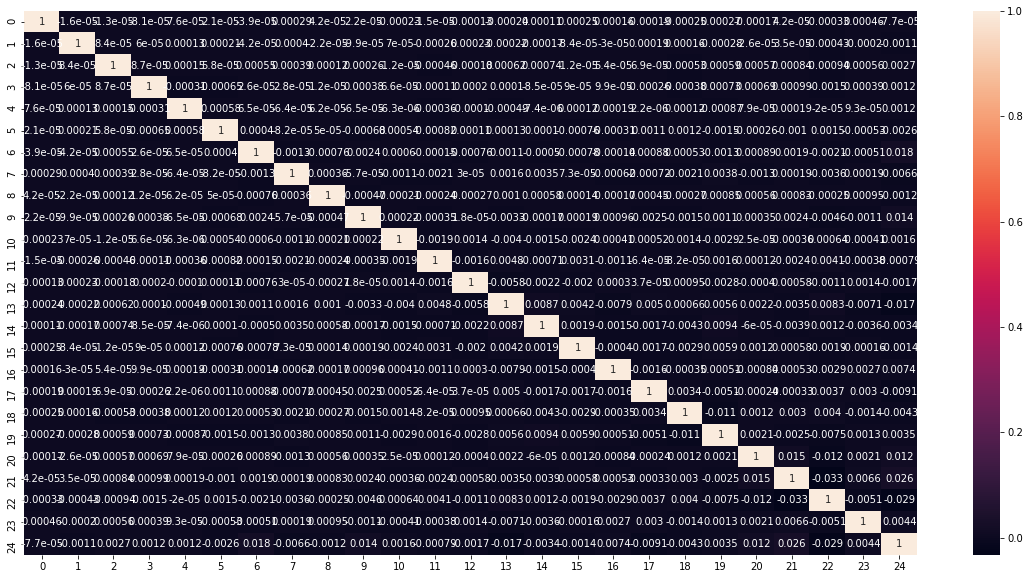

In [1938]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [1939]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0258988210415 , min corr:  -0.0325555104994


#### We can see that the PCA did a pretty good job as the correlations are very very minor

In [1940]:
#Applying selected components to the test data - 20 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(6927, 25)

# Classification Using Logistic Regression

In [1941]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca,y_train_sm)

C:\Users\Naresh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1942]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(X_test_pca)[:,1]
pred_probs_test_df = pd.DataFrame(model_pca.predict_proba(X_test_pca)[:,1])

#"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

In [1943]:
pred_probs_test_df.head()

,0
0,0.112952
1,0.484090
2,0.955142
3,0.423140
4,0.571772


In [1944]:
y_test_df = pd.DataFrame(y_test)

In [1945]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
pred_probs_test_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [1946]:
# Appending y_test_df and pred_probs_test_df
y_pred_final = pd.concat([y_test_df,pred_probs_test_df],axis=1)


In [1947]:
y_pred_final.head()

,churned,CustID,0
0,0,3379,0.112952
1,0,15218,0.484090
2,1,10331,0.955142
3,0,22966,0.423140
4,0,20665,0.571772


In [1948]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'LT_Churn_Prob'})

y_pred_final.head()

,churned,CustID,LT_Churn_Prob
0,0,3379,0.112952
1,0,15218,0.484090
2,1,10331,0.955142
3,0,22966,0.423140
4,0,20665,0.571772


In [1949]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','churned','LT_Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,churned,LT_Churn_Prob
0,3379,0,0.112952
1,15218,0,0.484090
2,10331,1,0.955142
3,22966,0,0.423140
4,20665,0,0.571772


In [1950]:
y_test_df.head()

,churned,CustID
0,0,3379
1,0,15218
2,1,10331
3,0,22966
4,0,20665


In [1951]:
len(y_pred_final.index)

6927

In [1952]:
y_pred_final.isnull().sum()

CustID           0
churned          0
LT_Churn_Prob    0
dtype: int64

In [1953]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['LT_predicted'] = y_pred_final.LT_Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [1954]:
# Let's see the head
y_pred_final.head()

,CustID,churned,LT_Churn_Prob,LT_predicted
0,3379,0,0.112952,0
1,15218,0,0.484090,0
2,10331,1,0.955142,1
3,22966,0,0.423140,0
4,20665,0,0.571772,1


In [1955]:
y_pred_final.describe()

,CustID,churned,LT_Churn_Prob,LT_predicted
count,6927.000000,6927.000000,6.927000e+03,6927.000000
mean,11509.915548,0.061065,3.451895e-01,0.258409
std,6675.845654,0.239468,2.458274e-01,0.437792
min,2.000000,0.000000,3.277546e-10,0.000000
25%,5775.500000,0.000000,1.413577e-01,0.000000
50%,11469.000000,0.000000,2.991721e-01,0.000000
75%,17321.500000,0.000000,5.091599e-01,1.000000
max,23085.000000,1.000000,9.997763e-01,1.000000


In [1956]:
y_pred_final.isnull().sum()

CustID           0
churned          0
LT_Churn_Prob    0
LT_predicted     0
dtype: int64

In [1957]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6927 entries, 0 to 6926
Data columns (total 4 columns):
CustID           6927 non-null int64
churned          6927 non-null int32
LT_Churn_Prob    6927 non-null float64
LT_predicted     6927 non-null int64
dtypes: float64(1), int32(1), int64(2)
memory usage: 189.5 KB


In [1958]:
y_pred_final['churned'] = y_pred_final['churned'].astype('int')

In [1959]:
from sklearn import metrics
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [1960]:
# Printing classification report
print(classification_report(y_pred_final.churned, y_pred_final.LT_predicted))

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      6504
           1       0.17      0.71      0.27       423

   micro avg       0.77      0.77      0.77      6927
   macro avg       0.57      0.74      0.57      6927
weighted avg       0.93      0.77      0.83      6927



In [1961]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churned, y_pred_final.LT_predicted )
confusion

array([[5013, 1491],
       [ 124,  299]], dtype=int64)

In [1962]:
y_pred_final[(y_pred_final['churned'] == 1) 
             & (y_pred_final['LT_predicted'] == 1)].count()

CustID           299
churned          299
LT_Churn_Prob    299
LT_predicted     299
dtype: int64

In [1963]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churned, y_pred_final.LT_predicted)

0.76685433809730041

In [1964]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

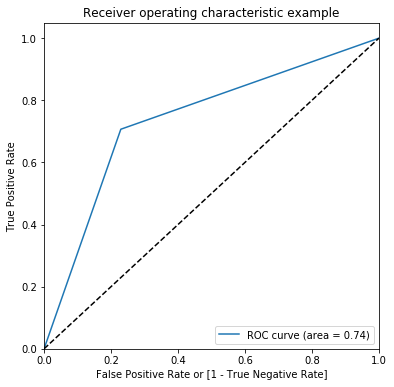

(array([ 0.        ,  0.22924354,  1.        ]),
 array([ 0.        ,  0.70685579,  1.        ]),
 array([2, 1, 0], dtype=int64))

In [1965]:
draw_roc(y_pred_final.churned, y_pred_final.LT_predicted)

In [1966]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_pred_final.churned, y_pred_final.LT_Churn_Prob))

'0.80'

In [1967]:
tn, fp, fn, tp = confusion.ravel()

In [1968]:
print('tn = ', tn)
print('fp = ', fp)
print('fn = ', fn)
print('tp = ', tp)

tn =  5013
fp =  1491
fn =  124
tp =  299


In [1969]:
confusion

array([[5013, 1491],
       [ 124,  299]], dtype=int64)

We can see that Logistic Regression is capturing the True positives quite well and Recall is also fine.
Let us try Decision Trees as well

# Decision Trees

In [1970]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [1971]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [1972]:
churn_df_std.head()

,aon,diff_arpu,diff_onnet_mou,diff_offnet_mou,diff_roam_ic_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_arpu_3g,diff_arpu_2g,diff_monthly_2g,diff_sachet_2g,diff_monthly_3g,diff_sachet_3g,diff_vbc_3g,diff_total_data_rech,diff_amt_data,night_pck_user_good,night_pck_user_action,fb_user_good,fb_user_action
0,-0.260646,-0.045011,-0.004723,-0.018182,0.002632,0.000406,0.017859,-0.000650,0.032052,0.064823,0.011399,-0.012901,-0.026393,0.045003,-0.026567,0.041342,0.084538,-0.07539,-0.014793,0.030887,0.003555,-0.021883,0.015439,0.030959,0.035992,0.035744,0.050327,0.045496,-0.052949,0.052772,0.050615,0.103564,0.126764,0.019087,0.001994,0.016840,-0.004266,0.027605,0.086155,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.146889,0.050313,0.075618,0,0,1,1
1,-0.944422,1.120553,1.443818,-0.189564,0.002632,0.000406,2.703181,0.213925,0.032052,-1.295309,1.677547,0.459397,-0.285727,0.045003,0.086459,0.041342,-0.674707,-0.07539,0.731923,0.262949,0.237616,0.031052,0.323790,0.036218,0.308916,0.035744,0.254565,0.387373,-0.052949,0.052772,0.050615,0.906392,1.170496,0.977929,0.133509,-0.987829,0.149564,0.797472,0.780228,-0.150570,0.019587,1.511280,-1.470716,0.016615,0.030682,1.963141,0.027496,0.295612,0,0,1,1
2,-0.520334,-0.326890,0.129253,-0.565910,0.002632,0.000406,-0.179754,-0.127710,-0.097876,0.064823,-0.199445,0.218360,-0.594953,0.045003,-0.289580,0.041342,0.084538,-0.07539,-0.324989,-0.150425,-0.270458,-0.275972,-0.328574,0.303339,-1.019774,0.035744,-0.571650,-0.488981,-0.052949,0.052772,0.050615,-0.699263,-0.276771,0.019087,-0.217197,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,-0.017564,0,0,0,0
3,-0.641801,-0.903118,0.062974,-0.434040,0.002632,0.000406,0.195842,-0.558390,0.032052,-3.304118,-0.292961,-0.012901,-0.169650,0.045003,-0.129839,0.041342,-1.226143,-0.07539,-0.270671,-0.464105,-0.361189,-0.001630,-0.518777,-0.332215,-0.726938,0.035744,-0.722074,-0.709575,-0.052949,0.365914,-1.598297,-0.164045,-0.683341,-0.913701,0.786697,-0.485494,-0.730026,-0.017029,-1.313592,-0.375833,0.021868,-0.027255,0.007916,0.016615,-1.358299,0.014178,-0.089633,-0.240360,0,0,1,1
4,-0.064833,0.103877,-0.972003,-0.116752,0.002632,0.000406,0.172703,0.050549,0.032052,0.064823,0.135635,-1.147396,-0.164937,0.045003,-0.847033,0.041342,0.084538,-0.07539,-0.665284,0.156581,0.036418,0.031052,0.114771,0.207010,-0.032185,0.035744,0.101586,0.201724,-0.052949,0.304371,0.050615,3.136468,0.299708,-0.606246,-0.962445,0.016840,-0.004266,-0.018083,0.071435,0.034321,0.019587,-0.027255,0.007916,0.016615,0.030682,0.069678,0.050313,0.115554,0,0,0,0


In [1973]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
#dt_default.fit(X_train, y_train)
dt_default.fit(X_train_pca,y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1974]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6504
           1       0.23      0.62      0.33       423

   micro avg       0.85      0.85      0.85      6927
   macro avg       0.60      0.74      0.62      6927
weighted avg       0.93      0.85      0.88      6927



In [1975]:
df_dt_pred = pd.DataFrame(y_pred_default)
#y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
df_dt_pred = df_dt_pred.rename(columns={0:'dt_pred_churn'})
df_dt_pred.head()

,dt_pred_churn
0,0
1,0
2,1
3,0
4,1


In [1976]:
y_pred_final = pd.concat([y_pred_final, df_dt_pred], axis=1)
y_pred_final.head()

,CustID,churned,LT_Churn_Prob,LT_predicted,dt_pred_churn
0,3379,0,0.112952,0,0
1,15218,0,0.484090,0,0
2,10331,1,0.955142,1,1
3,22966,0,0.423140,0,0
4,20665,0,0.571772,1,1


In [1977]:
y_pred_final.isnull().sum()

CustID           0
churned          0
LT_Churn_Prob    0
LT_predicted     0
dt_pred_churn    0
dtype: int64

In [1978]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5616  888]
 [ 160  263]]
0.848707954381


In [1979]:
### Plotting the Decision Tree
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(churn_df_std.columns[0:])
features

['aon',
 'diff_arpu',
 'diff_onnet_mou',
 'diff_offnet_mou',
 'diff_roam_ic_mou',
 'diff_roam_og_mou',
 'diff_loc_og_t2t_mou',
 'diff_loc_og_t2m_mou',
 'diff_loc_og_t2f_mou',
 'diff_loc_og_t2c_mou',
 'diff_loc_og_mou',
 'diff_std_og_t2t_mou',
 'diff_std_og_t2m_mou',
 'diff_std_og_t2f_mou',
 'diff_std_og_mou',
 'diff_isd_og_mou',
 'diff_spl_og_mou',
 'diff_og_others',
 'diff_total_og_mou',
 'diff_loc_ic_t2t_mou',
 'diff_loc_ic_t2m_mou',
 'diff_loc_ic_t2f_mou',
 'diff_loc_ic_mou',
 'diff_std_ic_t2t_mou',
 'diff_std_ic_t2m_mou',
 'diff_std_ic_t2f_mou',
 'diff_std_ic_mou',
 'diff_total_ic_mou',
 'diff_spl_ic_mou',
 'diff_isd_ic_mou',
 'diff_ic_others',
 'diff_total_rech_num',
 'diff_total_rech_amt',
 'diff_max_rech_amt',
 'diff_last_day_rch_amt',
 'diff_total_rech_data',
 'diff_av_rech_amt_data',
 'diff_vol_2g_mb',
 'diff_vol_3g_mb',
 'diff_arpu_3g',
 'diff_arpu_2g',
 'diff_monthly_2g',
 'diff_sachet_2g',
 'diff_monthly_3g',
 'diff_sachet_3g',
 'diff_vbc_3g',
 'diff_total_data_rech',
 'dif

# Hyperparameter Tuning

The default tree is quite complex, and we need to simplify it by tuning the hyperparameters. 

First, let's understand the parameters in a decision tree. You can read this in the documentation using ```help(DecisionTreeClassifier)```.


- **criterion** (Gini/IG or entropy): It defines the function to measure the quality of a split. Sklearn supports “gini” criteria for Gini Index & “entropy” for Information Gain. By default, it takes the value “gini”.
- **splitter**: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.
- **max_features**: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.
    - If an integer is inputted then it considers that value as max features at each split.
    - If float value is taken then it shows the percentage of features at each split.
    - If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
    - If “log2” is taken then max_features= log2(n_features).
    - If None, then max_features=n_features. By default, it takes “None” value.
- **max_depth**: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.
- **min_samples_split**: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider - -min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.
- **max_leaf_nodes**: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.
- **min_impurity_split**: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.<br>

In [1980]:
# # plotting tree with max_depth=3
# dot_data = StringIO()  
# export_graphviz(dt_default, out_file=dot_data,
#                 feature_names=features, filled=True,rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

## Tuning max_depth

Here, we are creating a dataframe with max_depth in range 1 to 80 and checking the accuracy score corresponding to each max_depth. 

To reiterate, a grid search scheme consists of:

    - an estimator (classifier such as SVC() or decision tree)
    - a parameter space
    - a method for searching or sampling candidates (optional) 
    - a cross-validation scheme, and
    - a score function (accuracy, roc_auc etc.)

In [1981]:
pd.DataFrame(y_train_sm).groupby(0).size()

0
0    15196
1    15196
dtype: int64

In [1982]:
import sklearn.metrics

In [1983]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [1984]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(3, 7)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring = 'recall')
tree.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(3, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [1985]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.171345,0.003663,0.001598,0.000487,3,{'max_depth': 3},0.716776,0.732807,0.710760,0.715367,0.696282,0.714399,0.011721,2,0.714791,0.721806,0.720819,0.726660,0.703299,0.717475,0.008031
1,0.219014,0.000490,0.001599,0.000493,4,{'max_depth': 4},0.678618,0.722935,0.697927,0.711089,0.681474,0.698407,0.016977,4,0.689536,0.714568,0.706671,0.719997,0.689562,0.704067,0.012589
2,0.272861,0.006131,0.001597,0.000486,5,{'max_depth': 5},0.687500,0.723593,0.714709,0.701876,0.700559,0.705646,0.012439,3,0.694636,0.716213,0.721231,0.711689,0.712347,0.711223,0.008963
3,0.313161,0.000891,0.001797,0.000399,6,{'max_depth': 6},0.726316,0.843370,0.856203,0.841395,0.774268,0.808305,0.050002,1,0.729763,0.845932,0.856873,0.853911,0.788435,0.814983,0.049387


Now let's visualize how train and test score changes with max_depth.

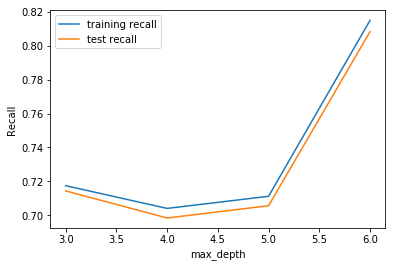

In [1986]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


You can see that as we increase the value of max_depth, both training and test score are fine till about max-depth = 3, after which the test score gradually reduces. Note that the scores are average accuracies across the 5-folds.

Thus, it is clear that the model is overfitting the training data if the max_depth is too high. Next, let's see how the model behaves with other hyperparameters.

# Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** indicates the minimum number of samples required to be at a leaf.<br>

So if the values of min_samples_leaf is less, say 5, then the will be constructed even if a leaf has 5, 6 etc. observations (and is likely to overfit).<br>

Let's see what will be the optimum value for min_samples_leaf.

In [1987]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [1988]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.782094,0.021928,0.002394,0.000488,5,{'min_samples_leaf': 5},0.888816,0.909181,0.897335,0.892070,0.900296,0.897539,0.007060,1,0.960020,0.961504,0.960188,0.958296,0.956404,0.959282,0.001764
1,0.644281,0.008735,0.001990,0.000006,25,{'min_samples_leaf': 25},0.847697,0.878578,0.886476,0.884172,0.853899,0.870163,0.016140,2,0.889520,0.906556,0.904088,0.906391,0.889446,0.899200,0.007982
2,0.588023,0.010653,0.001999,0.000011,45,{'min_samples_leaf': 45},0.842434,0.861468,0.832182,0.854228,0.852912,0.848644,0.010231,3,0.873149,0.881303,0.858106,0.868142,0.866332,0.869406,0.007672
3,0.536762,0.005623,0.001796,0.000402,65,{'min_samples_leaf': 65},0.844079,0.840408,0.827904,0.838434,0.839092,0.837984,0.005405,4,0.873643,0.857613,0.850621,0.847002,0.848976,0.855571,0.009718
4,0.509629,0.008746,0.002008,0.000015,85,{'min_samples_leaf': 85},0.814803,0.832511,0.836459,0.828233,0.813096,0.825020,0.009422,5,0.842300,0.846919,0.851855,0.837624,0.827178,0.841175,0.008448


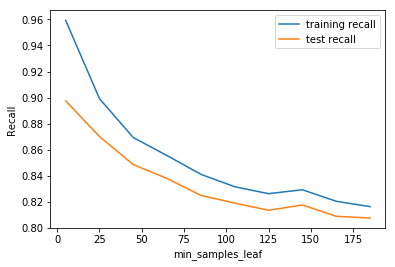

In [1989]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()


You can see that at low values of min_samples_leaf, the tree gets a bit overfitted. At values > 125, however, the model becomes more stable and the training and test accuracy start to converge.

## Tuning min_samples_split

The hyperparameter **min_samples_split** is the minimum no. of samples required to split an internal node. Its default value is 2, which means that even if a node is having 2 samples it can be furthur divided into leaf nodes.

In [1990]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="recall")
tree.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [1991]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.923070,0.012578,0.002192,0.000396,5,{'min_samples_split': 5},0.910197,0.916420,0.912142,0.909839,0.909839,0.911687,0.002516,1,0.991033,0.992186,0.990376,0.990705,0.990129,0.990886,0.000718
1,0.929322,0.017538,0.002394,0.000489,25,{'min_samples_split': 25},0.888487,0.897006,0.893386,0.891412,0.883843,0.890827,0.004457,2,0.954426,0.948096,0.952209,0.949001,0.952620,0.951270,0.002362
2,0.917244,0.020533,0.002411,0.000473,45,{'min_samples_split': 45},0.875329,0.887792,0.880553,0.877591,0.863113,0.876875,0.008062,3,0.931968,0.933207,0.926215,0.927285,0.921444,0.928024,0.004231
3,0.905216,0.019446,0.002380,0.000484,65,{'min_samples_split': 65},0.861842,0.872655,0.852912,0.868049,0.864758,0.864043,0.006625,4,0.914857,0.915522,0.896850,0.907296,0.912149,0.909335,0.006881
4,0.893000,0.018324,0.002410,0.000496,85,{'min_samples_split': 85},0.848355,0.871010,0.836459,0.866403,0.854228,0.855291,0.012445,5,0.899144,0.905487,0.882619,0.894711,0.891421,0.894676,0.007652


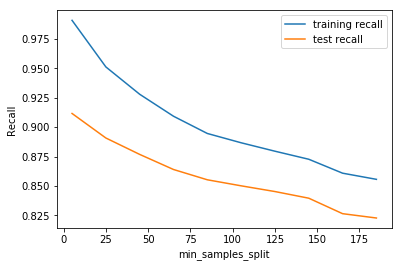

In [1992]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

This shows that as you increase the min_samples_split, the tree overfits lesser since the model is less complex.

## Grid Search to Find Optimal Hyperparameters

In [2040]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 10, 2),
    'min_samples_split': range(25, 150, 25),
    'min_samples_leaf': range(20, 120, 20),   
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, scoring="recall", verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train_sm)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 10, 2), 'min_samples_split': range(25, 150, 25), 'min_samples_leaf': range(20, 120, 20), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [2041]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.193410,0.005141,0.001604,0.000494,entropy,2,20,25,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
1,0.190994,0.003554,0.001411,0.000500,entropy,2,20,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
2,0.190486,0.001887,0.001782,0.000399,entropy,2,20,75,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
3,0.194572,0.004530,0.001491,0.000445,entropy,2,20,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
4,0.193363,0.001993,0.001815,0.000385,entropy,2,20,125,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
5,0.193294,0.000989,0.001617,0.000502,entropy,2,40,25,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
6,0.191018,0.000640,0.001600,0.000486,entropy,2,40,50,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
7,0.190102,0.000732,0.001384,0.000500,entropy,2,40,75,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
8,0.192518,0.001674,0.001782,0.000393,entropy,2,40,100,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101
9,0.192030,0.001591,0.001786,0.000397,entropy,2,40,125,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.746053,0.677855,0.672261,0.731491,0.667325,0.699000,0.032971,151,0.738648,0.672041,0.673521,0.743193,0.674755,0.700432,0.033101


In [2042]:
cv_results[['mean_test_score','rank_test_score','param_max_depth','param_min_samples_split', 'param_min_samples_leaf']
          ].sort_values('rank_test_score', ascending=True)

,mean_test_score,rank_test_score,param_max_depth,param_min_samples_split,param_min_samples_leaf
175,0.830745,1,8,25,20
176,0.830350,2,8,50,20
177,0.829495,3,8,75,20
178,0.827455,4,8,100,20
180,0.825217,5,8,25,40
181,0.825086,6,8,50,40
182,0.825086,6,8,75,40
179,0.824033,8,8,125,20
75,0.823967,9,8,25,20
183,0.823769,10,8,100,40


In [2044]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy (recall)", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy (recall) 0.830744932877
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


**Running the model with best parameters obtained from grid search.**

In [2045]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=8, 
                                  min_samples_leaf=20,
                                  min_samples_split=25)
clf_gini.fit(X_train_pca, y_train_sm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [2046]:
# accuracy score
clf_gini.score(X_test_pca,y_test)

0.78533275588277751

In [2047]:
# # plotting the tree
# dot_data = StringIO()  
# export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

In [2048]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
y_pred_default = clf_gini.predict(X_test_pca)
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.80      0.87      6504
           1       0.17      0.63      0.26       423

   micro avg       0.79      0.79      0.79      6927
   macro avg       0.57      0.71      0.57      6927
weighted avg       0.92      0.79      0.84      6927



In [2049]:
# confusion matrix
print(confusion_matrix(y_test,y_pred_default))

[[5173 1331]
 [ 156  267]]


## Random Forest

### Model Building

In [2050]:
# # Putting feature variable to X
# X = churn_df_std

# # Putting response variable to y
# y = churn_df_filter['churned']

# # Splitting the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [2051]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [2052]:
# fit
rfc.fit(X_train_pca,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2053]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [2054]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2055]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      6504
           1       0.35      0.40      0.37       423

   micro avg       0.92      0.92      0.92      6927
   macro avg       0.65      0.67      0.66      6927
weighted avg       0.92      0.92      0.92      6927



In [2056]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6186  318]
 [ 255  168]]


In [2057]:
print(accuracy_score(y_test,predictions))

0.917280207882


# Hyperparameter Tuning

The following hyperparameters are present in a random forest classifier. Note that most of these hypereparameters are actually of the decision trees that are in the forest.


- **n_estimators**: integer, optional (default=10): The number of trees in the forest.
- **criterion**: string, optional (default=”gini”)The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
- **max_features** : int, float, string or None, optional (default=”auto”)The number of features to consider when looking for the best split:
    - If int, then consider max_features features at each split.
    - If float, then max_features is a percentage and int(max_features * n_features) features are considered at each split.
    - If “auto”, then max_features=sqrt(n_features).
    - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
    - If “log2”, then max_features=log2(n_features).
    - If None, then max_features=n_features.
    - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.
- **max_depth** : integer or None, optional (default=None)The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- **min_samples_split** : int, float, optional (default=2)The minimum number of samples required to split an internal node:**
    - **If int, then consider min_samples_split as the minimum number.
    - **If float, then min_samples_split is a percentage and ceil(min_samples_split, n_samples) are the minimum number of samples for each split.
- **min_samples_leaf** : int, float, optional (default=1)The minimum number of samples required to be at a leaf node:**
    - **If int, then consider min_samples_leaf as the minimum number.**
    - **If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.**
- **min_weight_fraction_leaf** : float, optional (default=0.)The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
- **max_leaf_nodes** : int or None, optional (default=None)Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
- **min_impurity_split** : float,Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [2058]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 10, 2)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                   cv=n_folds, 
                   n_jobs=-1,
                   scoring="recall")
rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(2, 10, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [2059]:
# scores of GridSearch CV
scores = rf.cv_results_
scores_df = pd.DataFrame(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.440425,0.201373,0.011585,0.001322,2,{'max_depth': 2},0.781579,0.786114,0.723264,0.730833,0.719316,0.748223,0.029358,4,0.807091,0.777823,0.732089,0.741137,0.724027,0.756433,0.031307
1,0.503864,0.166556,0.012774,0.000738,4,{'max_depth': 4},0.817105,0.752550,0.732807,0.735110,0.735439,0.754606,0.032044,3,0.834485,0.745908,0.739245,0.748704,0.734803,0.760629,0.037250
2,0.647309,0.170781,0.023737,0.017834,6,{'max_depth': 6},0.807895,0.778546,0.773939,0.752550,0.782823,0.779152,0.017748,2,0.820089,0.779880,0.775603,0.771901,0.792054,0.787905,0.017464
3,0.718489,0.050862,0.015369,0.000816,8,{'max_depth': 8},0.826645,0.836788,0.819348,0.822639,0.831194,0.827323,0.006174,1,0.847976,0.855063,0.836144,0.844123,0.846261,0.845913,0.006111


In [2060]:
scores_df[['mean_test_score','rank_test_score','param_max_depth']].sort_values('rank_test_score', ascending=True)

,mean_test_score,rank_test_score,param_max_depth
3,0.827323,1,8
2,0.779152,2,6
1,0.754606,3,4
0,0.748223,4,2


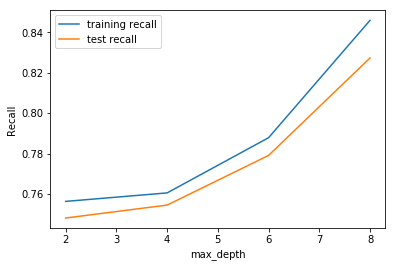

In [2061]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()


### Tuning n_estimators

In [2062]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(10,50,10)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  n_jobs=-1,
                   scoring="recall")
rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 50, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [2063]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.472335,0.057142,0.008178,0.000399,10,{'n_estimators': 10},0.800329,0.835801,0.734781,0.737414,0.770648,0.775796,0.038429,1,0.808161,0.833758,0.746484,0.751254,0.776014,0.783134,0.033465
1,0.654646,0.150831,0.013165,0.000399,20,{'n_estimators': 20},0.761842,0.777558,0.792695,0.739717,0.760448,0.766452,0.017799,3,0.766288,0.769269,0.796660,0.754462,0.771901,0.771716,0.013823
2,1.181040,0.148266,0.018550,0.000488,30,{'n_estimators': 30},0.800000,0.785785,0.765383,0.753866,0.745969,0.770203,0.020041,2,0.814166,0.783499,0.769351,0.769680,0.748951,0.777129,0.021551
3,1.675901,0.145409,0.030549,0.012304,40,{'n_estimators': 40},0.788816,0.772952,0.754525,0.736426,0.760118,0.762569,0.017612,4,0.794176,0.762606,0.760549,0.752488,0.768035,0.767571,0.014209


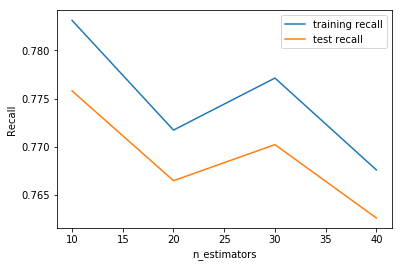

In [2064]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()


### Tuning max_features

Let's see how the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [2065]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
#parameters = {'max_features': [4, 8, 14, 20, 24]}
parameters = {'max_features': range(5,25,1)}
# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds,
                  n_jobs=-1,
                   scoring="recall")
rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_features': range(5, 25)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [2066]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.490307,0.189518,0.007979,4.623108e-07,5,{'max_features': 5},0.754605,0.796644,0.774268,0.769990,0.751234,0.769347,0.016218,1,0.751645,0.785885,0.779386,0.782101,0.761125,0.772028,0.013281
1,0.476344,0.110952,0.007779,3.987075e-04,6,{'max_features': 6},0.747697,0.761764,0.781507,0.734123,0.751563,0.755330,0.015803,3,0.745969,0.751995,0.781854,0.749280,0.756848,0.757189,0.012837
2,0.789108,0.184059,0.008178,3.989697e-04,7,{'max_features': 7},0.752961,0.767687,0.746627,0.736426,0.730503,0.746841,0.013018,5,0.749095,0.760220,0.752735,0.752817,0.740808,0.751135,0.006305
3,0.936343,0.150662,0.008176,4.004974e-04,8,{'max_features': 8},0.751974,0.781178,0.752879,0.740704,0.778546,0.761056,0.015964,2,0.746298,0.770914,0.757753,0.761208,0.790162,0.765267,0.014727
4,0.941625,0.050735,0.008003,5.564118e-04,9,{'max_features': 9},0.742105,0.749589,0.754854,0.731491,0.746298,0.744867,0.007882,6,0.738812,0.742042,0.759974,0.747306,0.754956,0.748618,0.007877


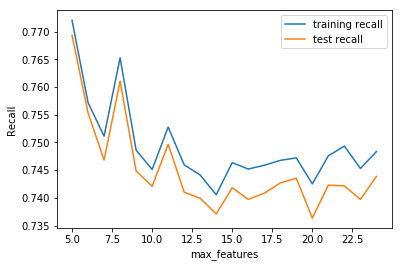

In [2067]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()


Apparently, the training and test scores *both* seem to increase as we increase max_features, and the model doesn't seem to overfit more with increasing max_features.

### Tuning min_samples_leaf

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [2068]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
#parameters = {'min_samples_leaf': range(100, 400, 50)}
parameters = {'min_samples_leaf': range(25,150,25)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  n_jobs=-1,
                   scoring="recall")
rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(25, 150, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [2069]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.426568,0.059058,0.007779,3.989935e-04,25,{'min_samples_leaf': 25},0.746053,0.755512,0.826917,0.735768,0.767358,0.766320,0.032043,2,0.744324,0.751748,0.831866,0.749198,0.779140,0.771255,0.032644
1,0.574372,0.110098,0.007979,6.305249e-04,50,{'min_samples_leaf': 50},0.742434,0.791379,0.801909,0.730503,0.741362,0.761516,0.029173,3,0.740622,0.781607,0.801678,0.744921,0.749527,0.763671,0.023871
2,0.649571,0.118523,0.007979,2.431402e-07,75,{'min_samples_leaf': 75},0.760526,0.784469,0.746627,0.732807,0.746298,0.754146,0.017513,5,0.754442,0.777823,0.752982,0.745003,0.745167,0.755084,0.012016
3,0.786602,0.072402,0.007578,8.026363e-04,100,{'min_samples_leaf': 100},0.783882,0.757157,0.731820,0.748602,0.779533,0.760200,0.019411,4,0.795574,0.748704,0.743522,0.761866,0.790409,0.768015,0.021315
4,0.488866,0.008845,0.006026,5.098359e-05,125,{'min_samples_leaf': 125},0.779276,0.806844,0.764067,0.836130,0.739717,0.785207,0.033503,1,0.797137,0.797894,0.771983,0.843876,0.747964,0.791771,0.031912


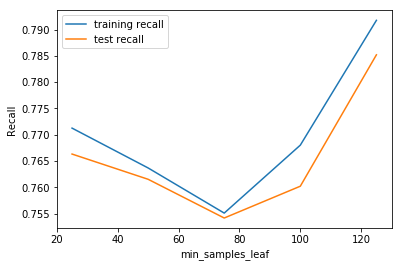

In [2070]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("Recall")
plt.legend()
plt.show()

### Tuning min_samples_split

Let's now look at the performance of the ensemble as we vary min_samples_split.

In [2071]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
#parameters = {'min_samples_split': range(200, 500, 50)}
parameters = {'min_samples_split': range(25,200,25)}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  n_jobs=-1,
                   scoring="recall")
rf.fit(X_train_pca, y_train_sm)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(25, 200, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [2072]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.474928,0.138304,0.008178,3.986599e-04,25,{'min_samples_split': 25},0.798026,0.769661,0.777887,0.739717,0.794998,0.776059,0.021006,1,0.809724,0.762606,0.783088,0.753804,0.802747,0.782394,0.021774
1,0.434636,0.065889,0.008378,4.887919e-04,50,{'min_samples_split': 50},0.834868,0.752221,0.734123,0.744982,0.747285,0.762701,0.036572,5,0.855380,0.744509,0.743769,0.763428,0.750925,0.771602,0.042478
2,0.658637,0.099794,0.008178,3.991128e-04,75,{'min_samples_split': 75},0.768750,0.773939,0.747614,0.734123,0.739388,0.752764,0.015855,7,0.776900,0.769433,0.753969,0.748458,0.738422,0.757436,0.013978
3,0.762360,0.097180,0.008178,3.991604e-04,100,{'min_samples_split': 100},0.769079,0.737085,0.787430,0.734781,0.747943,0.755265,0.020145,6,0.773281,0.731677,0.789998,0.745990,0.750432,0.758275,0.020743
4,0.662826,0.118387,0.007979,6.031566e-07,125,{'min_samples_split': 125},0.778289,0.762422,0.805528,0.740704,0.743337,0.766057,0.023999,4,0.784880,0.753393,0.807683,0.752982,0.750350,0.769857,0.022772


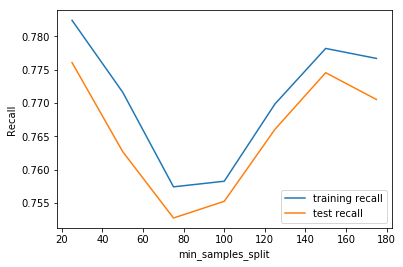

In [2073]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [ ]:
## Grid Search to Find Optimal Hyperparameters

In [ ]:
# # Create the parameter grid based on the results of random search 
# Between min_samples_leaf and min_samples_split, will use only min_samples_split

# param_grid = {
#     'max_depth': [4,8],
#     'min_samples_split': range(50, 150, 25),
#     'n_estimators': [10,15, 20], 
#     'max_features': [5, 7, 10]
# }
# # Create a based model
# rf = RandomForestClassifier()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, scoring="recall", verbose = 1)

In [ ]:
# Fit the grid search to the data
#grid_search.fit(X_train_pca, y_train_sm)

In [ ]:
# printing the optimal accuracy score and hyperparameters
# print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [2074]:
# The above Gridsearch is taking too long to run
# Instead what we will do is choose best parameter values found above in separate analysis
# 'max_depth' = 5
# 'n_estimators' = 20
# 'max_features' = 10
# 'min_samples_leaf' = 80 
# 'min_samples_split' = 80

**Fitting the final model with the best parameters obtained from grid search.**

In [2075]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=5,                             
                             min_samples_split=80,
                             min_samples_leaf=80,
                             max_features=10,
                             n_estimators=20)

In [2076]:
# fit
rfc.fit(X_train_pca,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=80, min_samples_split=80,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2080]:
# predict
predictions = rfc.predict(X_test_pca)

In [2081]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [2082]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      6504
           1       0.22      0.66      0.33       423

   micro avg       0.84      0.84      0.84      6927
   macro avg       0.60      0.75      0.62      6927
weighted avg       0.93      0.84      0.87      6927



In [2083]:
print(confusion_matrix(y_test,predictions))

[[5519  985]
 [ 144  279]]


In [2084]:
print(accuracy_score(y_test,predictions))

0.837014580627


# SVM

In [2085]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2086]:
# # Putting feature variable to X
# X = churn_df_std

# # Putting response variable to y
# y = churn_df_filter['churned']

# # Splitting the data into train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [2088]:
#Linear Model
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_pca, y_train_sm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [2089]:
# predict
y_pred = model_linear.predict(X_test_pca)

In [2090]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.784899667966 

[[5144 1360]
 [ 130  293]]


In [2091]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      6504
           1       0.18      0.69      0.28       423

   micro avg       0.78      0.78      0.78      6927
   macro avg       0.58      0.74      0.58      6927
weighted avg       0.93      0.78      0.84      6927



In [2092]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train_pca, y_train_sm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [2093]:
# predict
y_pred = non_linear_model.predict(X_test_pca)

In [2094]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.846253789519 

[[5589  915]
 [ 150  273]]


In [2095]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6504
           1       0.23      0.65      0.34       423

   micro avg       0.85      0.85      0.85      6927
   macro avg       0.60      0.75      0.63      6927
weighted avg       0.93      0.85      0.88      6927



# Commenting the below code to find C and Gamma value as it is time consuming 

The non-linear model gives good results. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

## Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

# Building and Evaluating the Final Model

In [2096]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.01, kernel="rbf")

model.fit(X_train_pca, y_train_sm)
y_pred = model.predict(X_test_pca)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print(classification_report(y_test,y_pred))


accuracy 0.826043020066 

[[5452 1052]
 [ 153  270]] 

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      6504
           1       0.20      0.64      0.31       423

   micro avg       0.83      0.83      0.83      6927
   macro avg       0.59      0.74      0.60      6927
weighted avg       0.93      0.83      0.86      6927



### Model Conclusion

In [ ]:
# Classification report for Logistic Regression
              
#               precision    recall  f1-score   support

#            0       0.98      0.77      0.86      6504
#            1       0.17      0.71      0.27       423

#    micro avg       0.77      0.77      0.77      6927
#    macro avg       0.57      0.74      0.57      6927
# weighted avg       0.93      0.77      0.83      6927


In [ ]:
# Classification report for Logistic Regression

#               precision    recall  f1-score   support

#            0       0.98      0.79      0.87      6504
#            1       0.18      0.69      0.28       423

#    micro avg       0.78      0.78      0.78      6927
#    macro avg       0.58      0.74      0.58      6927
# weighted avg       0.93      0.78      0.84      6927

### Both Logistic Regression and SVM - Linear performnace as per "Recall" value of around 70 is good.
- Our recommendation is for SVC provided System - Infra availability si good due to time it takes to model
- Otherwise Logistic Regerssion is good enough considering it's simplicity.

### RFE - To idenify the attributes impacting Churn

In [2097]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE

In [2098]:
# Running RFE with the output number of the variable equal to 9
lr = LogisticRegression()
rfe = RFE(lr, 10, verbose=1)             # running RFE
rfe = rfe.fit(X_train_sm, y_train_sm)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 fe

In [2100]:
top_cols = X_train.columns[rfe.support_]

In [2101]:
top_cols

Index(['aon', 'diff_onnet_mou', 'diff_loc_og_t2m_mou', 'diff_loc_og_mou',
       'diff_std_og_t2m_mou', 'diff_std_og_mou', 'night_pck_user_good',
       'night_pck_user_action', 'fb_user_good', 'fb_user_action'],
      dtype='object')

### So the variables impacting churn are 
- Age on network
- All kind of calls within the same operator network
- Local Outgoing calls to other mobile operator network and overall local outgoing
- STD Outgoing calls to other mobile operator network and overall STD outgoing
- Night Pack Services and Facebook services 


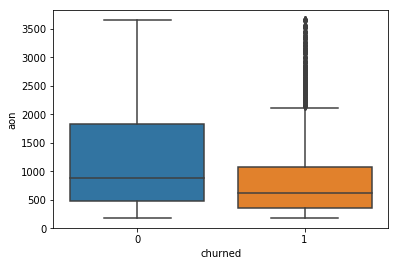

In [2103]:
sns.boxplot(x='churned',y='aon',data=churn_df_filter)

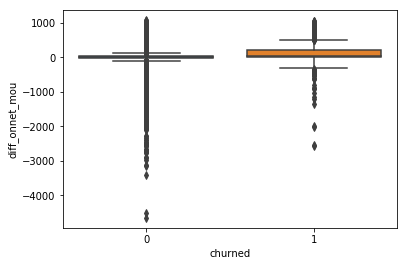

In [2104]:
sns.boxplot(x='churned',y='diff_onnet_mou',data=churn_df_filter)

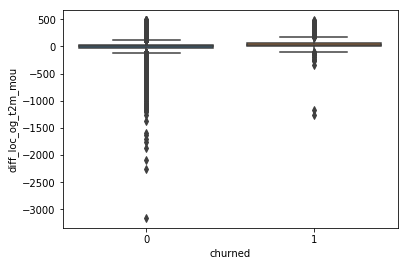

In [2105]:
sns.boxplot(x='churned',y='diff_loc_og_t2m_mou',data=churn_df_filter)

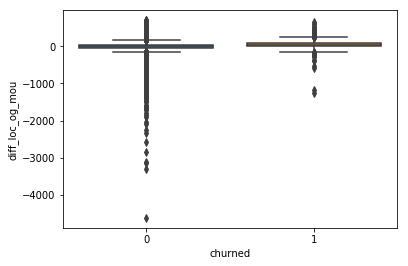

In [2106]:
sns.boxplot(x='churned',y='diff_loc_og_mou',data=churn_df_filter)

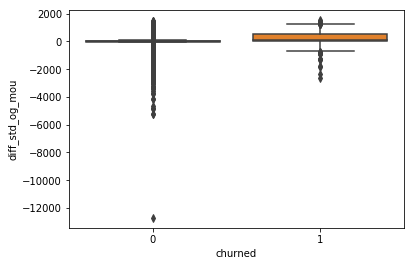

In [2107]:
sns.boxplot(x='churned',y='diff_std_og_mou',data=churn_df_filter)

### Recommended strategies to manage customer churn 

- There is potential to retain customers who have been using network for sometime. Keep an eye over these customers. Marketing of servcies can be targeted towrads these customers.
- Customers which exhibit behaviour of decline in usage of either network across net or in making local/STD calls. 
Basically where there is decline trend across usage within same operator or across. 

